# How does a Nation's Economy effect its Happiness?

# Table of Contents

# Overview

Do economic factors play a role in people's happiness? Our project hopes to scratch the surface of this multifaceted question. 
The 5 biggest factors we chose to investigate were employment, GDP, tax revenue, trade and primary income payments and the results 
were that GDP and primary income payments were the largest contributors towards having a correlation with higher happiness levels.

# Names

- Paul Doan
- Sarah Baker
- Scott Sutherland
- Felix Campos
- Christopher Erpelding

<a id='research_question'></a>
# Research Question

How do various economic aspects of a person's life such as (employment, gdp, tax revenue, trade and primary income payments), influence their happiness in certain countries from 2015 to now?

<a id='background'></a>

## Background & Prior Work

- https://www.kaggle.com/unsdsn/world-happiness
- https://www.kaggle.com/frtgnn/minimum-wages-between-2001-2018
- https://www.kaggle.com/lislejoem/us-minimum-wage-by-state-from-1968-to-2017

For the question, we decided to investigate the happiness score of certain countries and what things play a role in how countries would rate their overall happiness. Starting with the first data set, we found that just by looking at the data in the data set, it appears that things such as GDP and family play a role in how happy people say they are. This is because countries that have higher reports of happiness are more likely to have higher scores in GDP, family, freedom, and health. 
The next data set we found that helps in a deeper investigation of the topic is the minimum wage in some countries. We can use this in addition to the first dataset to determine how money and happiness are correlated. We can also use this dataset to increase the number of financial variables that affect happiness besides GDP.
The third data set contains the minimum wage for the United States by year which gives us a good idea of how minimum wage changes over the years and we can use it to determine how much minimum wage and the changing of it overtime plays a role in overall happiness.

Similar Research:

- https://www.kaggle.com/sugandhkhobragade/minimum-wages-around-the-world-eda/

This dataset analysis analyzes the correlation between minimum wage and world development. We can use this to help determine whether or not minimum wage affects the overall happiness of a country by checking if the economy improved when the minimum wage increased.

- https://www.kaggle.com/javadzabihi/happiness-2017-visualization-prediction

This project made use of the Happiness Report dataset in order to determine what factors contributed most heavily to the happiness of a nation. The exploratory analysis in this project includes many different types of plots which compare multiple factors as it searched for different types of correlations. Through this analysis, they were able to summarize what nations had greater happiness based on different metrics and even broke these conclusions down by region.

# Hypothesis


We predict that there exists a significant relationship between these various economic factors and the self-reported happiness of a country. It seems reasonable to think that a strong economy provides individuals with the ability to satisfy their basic needs and live prosperously, which should ultimately lead to greater levels of happiness. 

# Dataset(s)

### Dataset #1
<hr>
<b>Income by Country</b>

https://www.kaggle.com/frankmollard/income-by-country?select=Income+by+Country.xlsx

Via user Frank Mollard on Kaggle

&nbsp;

This dataset is an Excell Workbook with a number of spreadsheets on different national econommic metrics over the past 20-30 years. We will focus on the income by country, GDP per Capita and GNI per Capita broken down by Gender (Male/Female).

Desriptions of each table's data are given below:
##### Income Index
>GNI per capita (2011 PPP International \\$, using natural logarithm) expressed as an index using a minimum value of \\$100 and a maximum value \$75,000.

##### GDP
>GDP in a particular period divided by the total population in the same period.

##### GNI Females
>Derived from the ratio of female to male wages, female and male shares of economically active population and gross national income (in 2011 purchasing power parity terms).

##### GNI Males
>Derived from the ratio of female to male wages, female and male shares of economically active population and gross national income (in 2011 purchasing power parity terms). 

&nbsp;

### Dataset #2
<hr>
<b>World Development Index</b>

https://datacatalog.worldbank.org/dataset/world-development-indicators

Via The World Bank's Data Catalog

&nbsp;

This is a comprehensive dataset with ~25 million observations. It is very large for our needs and has obeservations for many years that we will not need. Once filtered down to what we can potentially use, it has instead around ~3 million data points. The data itself give quatatative representations of a wide array of metrics that could potentially be influential on the overall well-being/happiness of a nation for up to 217 nations/economic bodies for most features.


At this point, we are unsure about which features exactly we will focus on, but indexing the dataset by features, it will make it very easy to query for a feature and then combine these feature(s) with other datasets (namely the income one) by the name of the country/economic body.

&nbsp;

### Dataset #3
<hr>
<b>World Happiness Report</b>

https://www.kaggle.com/unsdsn/world-happiness

Via Sustainable Development Solutions Network on Kaggle

&nbsp;

The world happiness dataset has many observations but not too many columns which helps make it concise and manageable. All of the factors in the dataset are relevant to our project topic too which makes it a clean dataset. 

In order to get the datasets into a usable format, we first had to turn the csv’s into dataframes. Additionally, we called the describe function in order to get detailed statistics for each dataset. We also found out the number of observations and columns in the dataset while also displaying the column names for the datasets. After doing all of this, we decided that each column was necessary for completing our project so we kept them. The dataset was initially already very clean so we just had to confirm that the data was relevant to our project and usable. 

We checked the data distributions using the describe function for the datasets and also examined the contents of the datasets by printing them out. Additionally, we made sure that there were enough observations and that the columns in the datasets were relevant to our project topic. Transformations of our dataset were not necessary.

# Setup

Uncomment and run the folowing cells and run to install needed packages if not already installed

In [1]:
# !pip install --user numpy
# !pip install --user matplotlib
# !pip install --user pandas
# !pip install --user seaborn
# !pip install --user patsy
# !pip install --user statsmodels
# !pip install --user bs4
# !pip install --user geopandas
# !pip install --user descartes

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import patsy
import statsmodels.api as sm
from bs4 import BeautifulSoup
import requests
import re
import os
import geopandas
import descartes
from mpl_toolkits.axes_grid1 import make_axes_locatable
import shapely.geometry as shp
import warnings
warnings.filterwarnings('ignore')

In [3]:
income = pd.read_csv(os.path.join("data", "income_index.csv"))
gdp = pd.read_csv(os.path.join("data", "gdp_per_capita.csv"))
gni_male = pd.read_csv(os.path.join("data", "gni_per_capita_male.csv"))
gni_female = pd.read_csv(os.path.join("data", "gni_per_capita_female.csv"))
wdi = pd.read_csv(os.path.join("data", "WDIData.csv"))
happiness2015 = pd.read_csv(os.path.join("data", "happiness2015.csv"))
happiness2016 = pd.read_csv(os.path.join("data", "happiness2016.csv"))
happiness2017 = pd.read_csv(os.path.join("data", "happiness2017.csv"))
happiness2018 = pd.read_csv(os.path.join("data", "happiness2018.csv"))
happiness2019 = pd.read_csv(os.path.join("data", "happiness2019.csv"))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Data Cleaning

In [4]:
income.isna().sum().sum()

0

In [5]:
income.dtypes

Country    object
1990       object
1991       object
1992       object
1993       object
1994       object
1995       object
1996       object
1997       object
1998       object
1999       object
2000       object
2001       object
2002       object
2003       object
2004       object
2005       object
2006       object
2007       object
2008       object
2009       object
2010       object
2011       object
2012       object
2013       object
2014       object
2015       object
2016       object
2017       object
2018       object
dtype: object

There isn't a single NaN value in this whole dataset, however, the data in the columns representing year seem to be represented ar objects (most likely strings). As each observation is clearly a numerical value which we will be performing calculations on, lets convert these values to floats!

Given that there are no missing values and that entries which seem to be floats have been represented as strings, there is probably some placeholder values for missing values which makes Pandas think the columns are non-numeric. Let's see if we can find and replace them with NaNs.


In [6]:
income = income[[c for c in income.columns if c != "Country"]].apply(
    pd.to_numeric, errors="coerce"
).assign(
    Country=income["Country"]
)

income.dtypes

1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
Country     object
dtype: object

Ok, now we have our numerical data as floats and all that was non-numerical should now be NaN. Let's check how many.

In [7]:
income.isna().sum().sum()

96

In [8]:
income.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Country
0,0.466,0.440,0.431,0.376,0.328,0.381,0.366,0.354,0.343,0.331,...,0.426,0.421,0.435,0.438,0.436,0.435,0.434,0.434,0.432,Afghanistan
1,0.572,0.521,0.506,0.526,0.541,0.563,0.578,0.561,0.576,0.595,...,0.693,0.699,0.700,0.705,0.707,0.711,0.717,0.721,0.727,Albania
2,0.695,0.687,0.687,0.683,0.677,0.678,0.681,0.681,0.688,0.689,...,0.735,0.734,0.734,0.735,0.737,0.739,0.745,0.743,0.743,Algeria
3,0.936,0.934,0.929,0.923,0.922,0.923,0.929,0.942,0.947,0.953,...,0.916,0.910,0.910,0.914,0.920,0.924,0.928,0.931,0.935,Andorra
4,0.562,0.576,0.431,0.428,0.388,0.506,0.505,0.530,0.527,0.511,...,0.614,0.613,0.622,0.626,0.630,0.629,0.620,0.617,0.607,Angola


Since we are ultimately interested in the effect this data has on world happiness, and the World Happiness Report only reports data as early as 2012, we can remove all the year this dataset has prior to that.

In [9]:
income = income.loc[:, income.columns.isin([str(year) for year in range(2012, 2019)] + ["Country"])]
income.head()

,2012,2013,2014,2015,2016,2017,2018,Country
0,0.435,0.438,0.436,0.435,0.434,0.434,0.432,Afghanistan
1,0.700,0.705,0.707,0.711,0.717,0.721,0.727,Albania
2,0.734,0.735,0.737,0.739,0.745,0.743,0.743,Algeria
3,0.910,0.914,0.920,0.924,0.928,0.931,0.935,Andorra
4,0.622,0.626,0.630,0.629,0.620,0.617,0.607,Angola


In [10]:
income.isna().sum().sum()

14

In [11]:
income[income.isna().any(axis=1)]

,2012,2013,2014,2015,2016,2017,2018,Country
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Human Development
197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regions


By filtering like this, it looks lihe we still have 14 missing values. Foutunately, all of the values missing are found in rows that will not be particularly useful for our analysis, so we will drop them.

In [12]:
income = income[~income.isna().any(axis=1)]
income.head()

,2012,2013,2014,2015,2016,2017,2018,Country
0,0.435,0.438,0.436,0.435,0.434,0.434,0.432,Afghanistan
1,0.700,0.705,0.707,0.711,0.717,0.721,0.727,Albania
2,0.734,0.735,0.737,0.739,0.745,0.743,0.743,Algeria
3,0.910,0.914,0.920,0.924,0.928,0.931,0.935,Andorra
4,0.622,0.626,0.630,0.629,0.620,0.617,0.607,Angola


As the GDP and GNI datasets are similarly formatted, we will take the same steps to clean them.

In [13]:
gdp = gdp.loc[:, gdp.columns.isin([str(year) for year in range(2012, 2019)] + ["Country"])]
gdp = gdp[[c for c in gdp.columns if c != "Country"]].apply(
    pd.to_numeric, errors="coerce"
).assign(
    Country=income["Country"]
)

gni_male = gni_male.loc[:, gni_male.columns.isin([str(year) for year in range(2012, 2019)] + ["Country"])]
gni_male = gni_male[[c for c in gni_male.columns if c != "Country"]].apply(
    pd.to_numeric, errors="coerce"
).assign(
    Country=income["Country"]
)

gni_female = gni_female.loc[:, gni_female.columns.isin([str(year) for year in range(2012, 2019)] + ["Country"])]
gni_female = gni_female[[c for c in gni_female.columns if c != "Country"]].apply(
    pd.to_numeric, errors="coerce"
).assign(
    Country=income["Country"]
)

For GDP, we note and are clear in our future analysis that the following nations have no data:
- CÃ´te d'Ivoire
- El Salvador
- Yemen
- Zambia
- Zimbabwe
&nbsp;

The same is true among these nations for GNI for both males and females:
- Uganda
- Ukraine
- United Arab Emirates
- United Kingdom
- United States
- Uruguay
- Uzbekistan
- Vanuatu
- Venezuela (Bolivarian Republic of)
- Viet Nam
- Yemen
- Zambia

(We notice these nations come at the end alphabetically, implying there is likely something beyond randomness in the missingness of these rows)

Now, lets move on to the World Development Index Dataset.

In [14]:
wdi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.099146,88.101280,87.201762,87.935480,88.504036,89.623031,88.305919,89.512282,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.772130,78.030079,76.216620,77.573293,78.460673,80.861655,78.032524,80.095767,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.516193,96.815398,96.485883,96.711140,97.007744,97.199206,96.900466,97.413983,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN,NaN


Again, we notice that this dataset has data for many more year than the ones our analysis will focus on. Let's remove those as well as the Indicator Code column.

In [15]:
wdi = wdi.loc[:, wdi.columns.isin(
    [str(year) for year in range(2012, 2019)] + ["Country Name", "Country Code", "Indicator Name"]
)]

# wdi.isna().sum().sum() / (wdi.shape[0] * wdi.shape[1])
wdi.head()

,Country Name,Country Code,Indicator Name,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,Access to clean fuels and technologies for coo...,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),86.099146,88.101280,87.201762,87.935480,88.504036,89.623031,88.305919
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",73.772130,78.030079,76.216620,77.573293,78.460673,80.861655,78.032524
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",96.516193,96.815398,96.485883,96.711140,97.007744,97.199206,96.900466
4,Arab World,ARB,Account ownership at a financial institution o...,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN


This table has a row for each nation or region and a corresponding 'indicator'. To get easy access to these different indicatiors, lets pivot by these indicators.

In [16]:
wdi_by_indicator = pd.pivot_table(data=wdi, index=["Indicator Name", "Country Name"])
wdi_by_indicator.head()

2012  2013  \
Indicator Name                                     Country Name               
ARI treatment (% of children under 5 taken to a... Afghanistan    NaN   NaN   
                                                   Albania        NaN   NaN   
                                                   Algeria       66.4  66.4   
                                                   Angola         NaN   NaN   
                                                   Argentina     94.3   NaN   

                                                                 2014  2015  \
Indicator Name                                     Country Name               
ARI treatment (% of children under 5 taken to a... Afghanistan    NaN  61.5   
                                                   Albania        NaN   NaN   
                                                   Algeria        NaN   NaN   
                                                   Angola         NaN   NaN   
                                                   Argentina      NaN   NaN   

                                                                 2016  2017  \
Indicator Name                                     Country Name               
ARI treatment (% of children under 5 taken to a... Afghanistan    NaN   NaN   
                                                   Albania        NaN   NaN   
                                                   Algeria        NaN   NaN   
                                                   Angola        49.0   NaN   
                                                   Argentina      NaN   NaN   

                                                                 2018  
Indicator Name                                     Country Name        
ARI treatment (% of children under 5 taken to a... Afghanistan   67.7  
                                                   Albania       82.4  
                                                   Algeria        NaN  
                                                   Angola         NaN  
                                                   Argentina      NaN

Now, if we wished for example, to find data on the numbers of individuals falling under the indicator "Young people (ages 15-24) newly infected with HIV", we can simply do the following:

In [17]:
wdi_by_indicator.loc["Young people (ages 15-24) newly infected with HIV"].head()

,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,
Afghanistan,500.0,500.0,500.0,500.0,500.0,500.0,500.0
Albania,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Algeria,500.0,500.0,500.0,500.0,500.0,500.0,500.0
Angola,8900.0,8900.0,8700.0,8600.0,8600.0,8900.0,8900.0
Argentina,1200.0,1200.0,1200.0,1200.0,1100.0,1100.0,1100.0


Having a list of the possible indicators to search by might also be useful: we'll simply call a list of them indicators

In [18]:
indicators = wdi_by_indicator.index.get_level_values(0).unique()

Later, we can join this dataset to the others above once we determine the indicators we are most interested in.

Finally, we'll tidy up the happiness datasets. Luckily they are very clean, but seeing as the data is broken into seperate files for each year, lets try to concatenate it into one table. Before we can do this though, we need to clean up the column names as they differ between each dataset.


In [19]:
happiness2017 = happiness2017.rename(columns={
    "Happiness.Rank":"Happiness Rank", 
    "Economy..GDP.per.Capita.": "Economy (GDP per Capita)",
    "Health..Life.Expectancy.":"Health (Life Expectancy)",
    "Happiness.Score": "Happiness Score",
    "Trust..Government.Corruption.": "Trust (Government Corruption)",
    "Dystopia.Residual": "Dystopia Residual"
})

happiness2018 = happiness2018.rename(columns={
    "Overall rank":"Happiness Rank",
    "Country or region": "Country",
    "Score": "Happiness Score",
    "GDP per capita": "Economy (GDP per Capita)",
    "Healthy life expectancy":"Health (Life Expectancy)",
    "Freedom to make life choices": "Freedom",
    "Perceptions of corruption": "Trust (Government Corruption)"
})

happiness2019 = happiness2019.rename(columns={
    "Overall rank":"Happiness Rank",
    "Country or region": "Country",
    "Score": "Happiness Score",
    "GDP per capita": "Economy (GDP per Capita)",
    "Healthy life expectancy":"Health (Life Expectancy)",
    "Freedom to make life choices": "Freedom",
    "Perceptions of corruption": "Trust (Government Corruption)"
})

We've renamed the ones we can, now lets find the columns they all share after adding a year column:

In [20]:
happiness_dfs = [
    happiness2015, happiness2016, happiness2017, happiness2018, happiness2018
]

for i, df in enumerate(happiness_dfs):
    df["Year"] = pd.Series([str(2015 + i)] * df.shape[0])

set.intersection(*map(set, [list(df.columns) for df in happiness_dfs]))

{'Country',
 'Economy (GDP per Capita)',
 'Freedom',
 'Generosity',
 'Happiness Rank',
 'Happiness Score',
 'Health (Life Expectancy)',
 'Trust (Government Corruption)',
 'Year'}

Now, we will pull out just the columns we can use from each table and reorder them as we concatenate.

In [21]:
happiness_columns = [
    'Country',
    'Year',
    'Happiness Rank',
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Health (Life Expectancy)',
    'Freedom',
    'Generosity',
    'Trust (Government Corruption)'
]


for i, df in enumerate(happiness_dfs):
    happiness_dfs[i] = df[happiness_columns]

happiness = pd.concat(happiness_dfs).reset_index(drop=True)

In [22]:
happiness.head()

,Country,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,Switzerland,2015,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978
1,Iceland,2015,2,7.561,1.30232,0.94784,0.62877,0.43630,0.14145
2,Denmark,2015,3,7.527,1.32548,0.87464,0.64938,0.34139,0.48357
3,Norway,2015,4,7.522,1.45900,0.88521,0.66973,0.34699,0.36503
4,Canada,2015,5,7.427,1.32629,0.90563,0.63297,0.45811,0.32957


We now have a single, cleaned table with each year.

To pull it all together, the following function and code grabs data associated from our "focused indicators" from the WDI dataset and merges it with the happiness data. This allows us to have one main table from which we can work.

In [23]:
def reorient(indicator):
    indicator_table = wdi_by_indicator.loc[
        indicator
    ].reset_index().drop(columns=[
        "2012", "2013", "2014"
    ])
    
    df = pd.DataFrame()
    table_data = {}
    for i in range(indicator_table.shape[0]):
        for j in indicator_table.columns:
            row = {
                "Country":indicator_table.loc[i, "Country Name"],
                "Year":j,
                indicator:indicator_table.loc[i, j]
            }
            if row["Country"] == row[indicator]:
                continue
            df = df.append(row, ignore_index=True)
    
    return df.reindex(columns=[
        "Country", "Year", indicator
    ])

focused_indicators = [
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Tax revenue (% of GDP)",
    "GDP per capita (constant 2010 US$)",
    "Primary income payments (BoP, current US$)",
    "Trade (% of GDP)"
]

main = None
for i in focused_indicators:
    df = reorient(i)
    if not isinstance(main, pd.DataFrame):
        main = df
        continue
    main = pd.merge(main, df, on=["Country", "Year"])

common = set(happiness["Country"].unique()).intersection(set(main["Country"].unique()))
main = main[main["Country"].isin(common)]
happiness = happiness[happiness["Country"].isin(common)][["Country", "Year", "Happiness Score"]]
df = pd.merge(main, happiness, on=["Country", "Year"])

In [24]:
df["Year"] = df["Year"].astype(np.int64)
df

,Country,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Tax revenue (% of GDP),GDP per capita (constant 2010 US$),"Primary income payments (BoP, current US$)",Trade (% of GDP),Happiness Score
0,Albania,2015,17.190001,18.515796,4524.373086,2.813238e+08,71.801040,4.959
1,Albania,2016,15.420000,17.590228,4681.826563,2.594022e+08,74.809821,4.655
2,Albania,2017,13.620000,18.887486,4864.310616,4.271584e+08,78.194275,4.644
3,Angola,2015,7.260000,11.002019,3748.320118,6.073893e+09,62.888521,4.033
4,Angola,2016,7.200000,9.732512,3530.310672,5.614473e+09,53.370155,3.866
...,...,...,...,...,...,...,...,...
315,Zambia,2016,10.880000,13.353181,1652.602940,7.241178e+08,73.958561,4.795
316,Zambia,2017,11.630000,15.184857,1660.766216,1.217854e+09,71.585695,4.514
317,Zimbabwe,2015,5.290000,17.673363,1234.103352,3.695732e+08,56.748811,4.610
318,Zimbabwe,2016,5.240000,15.458341,1224.309922,3.986379e+08,51.219025,4.193


Finally, we will also add some geographical data to our main dataframe that will help us generate some nice visualizations later

In [25]:
geo_dict = world[["name", "geometry"]]
geo_dict["name"] = geo_dict["name"].replace({
    "Bosnia and Herz.":"Bosnia and Herzegovina",
    "Czechia":"Czech Republic",
    "Dominican Rep.":"Dominican Republic",
    "United States of America":"United States"
})
geo_dict = geo_dict.set_index("name").to_dict()["geometry"]

df_geo = geopandas.GeoDataFrame(df.copy())
df_geo["geometry"] = df["Country"].apply(lambda x: geo_dict[x] if x in geo_dict else np.NaN)

# Data Analysis & Results

In [26]:
# Some styling setup
style.use("ggplot")
# palette_main = sns.diverging_palette(175, 10, s=75, l=40, n=108, center="light")
figsize_default = (16, 16)
figsize_default_vertical = (16, 18)

To get a little bit of a better understanding of our data, we'll create some visualizations and look at the distributions some of our variables take and relationships between them.

First, lets look at the distribution of the happiness scores themselves.

Text(0.5, 1.0, 'Distribution of Happiness Scores')

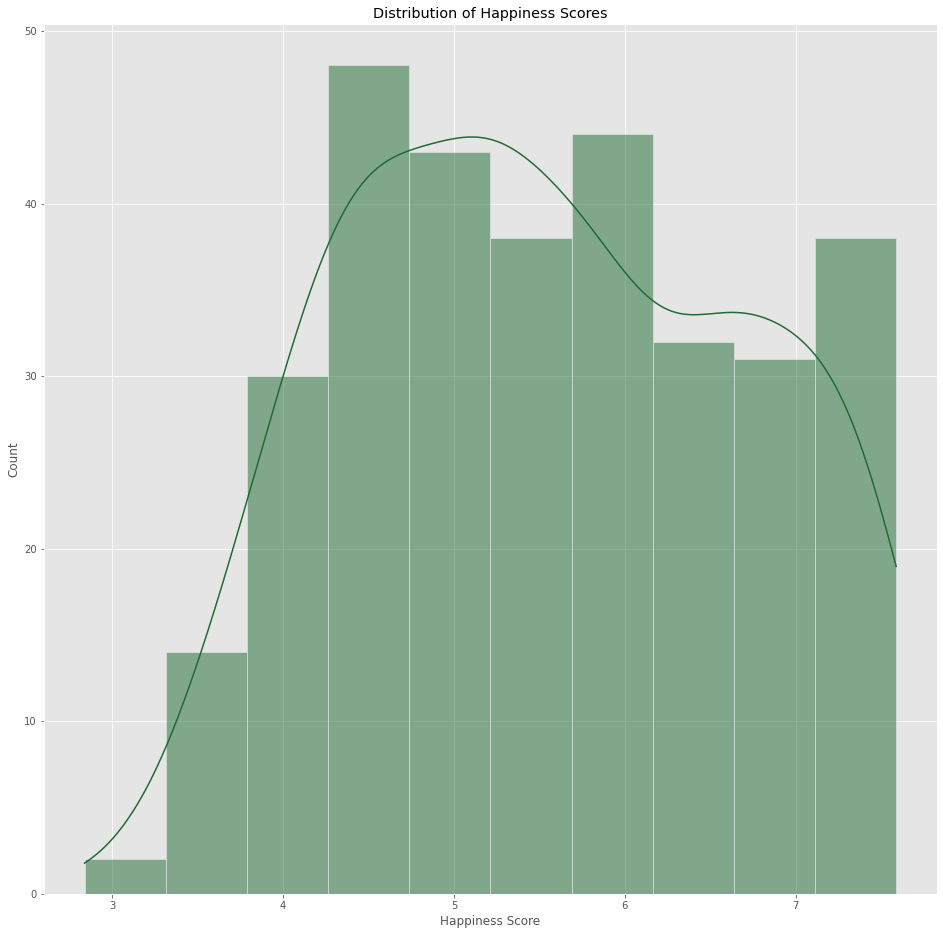

In [27]:
# df["Happiness Score"].plot(
#     kind="hist", bins=np.arange(1, 10, 0.5), title="Distribution of Happiness Scores", figsize=figsize_default_horizontal
# )

fig, ax = plt.subplots(figsize=figsize_default)
sns.histplot(
    ax=ax,
    data=df["Happiness Score"],
    kde=True,
    color="#1f6b33"
)
plt.title("Distribution of Happiness Scores")

We can see that the happiness scores are somewhat normal, but there is an argument to be made that they are bimodal. We also notice that the scores are bounded between ~2.5 and ~8, or more specifically 2.839 and 7.587.

Now, lets plot the happiness scores from country we have data for on a map

Text(0.5, 1.0, 'Self-Reported Happiness by Country')

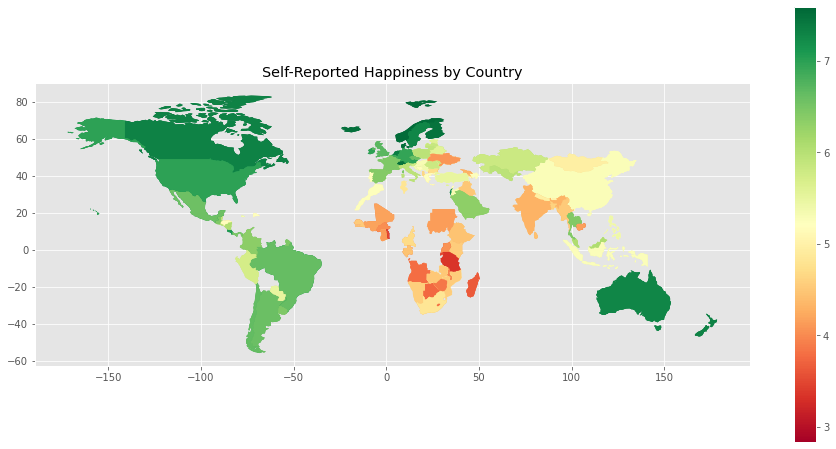

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
divider = make_axes_locatable(ax)
df_geo.plot(column="Happiness Score", ax=ax, legend=True, cmap="RdYlGn")
plt.title("Self-Reported Happiness by Country")

There are a lot of countries represented in this dataset, lets see which ones tend to be happier of average according to this metric.

Text(0.5, 1.0, 'Happiness Scores by Country')

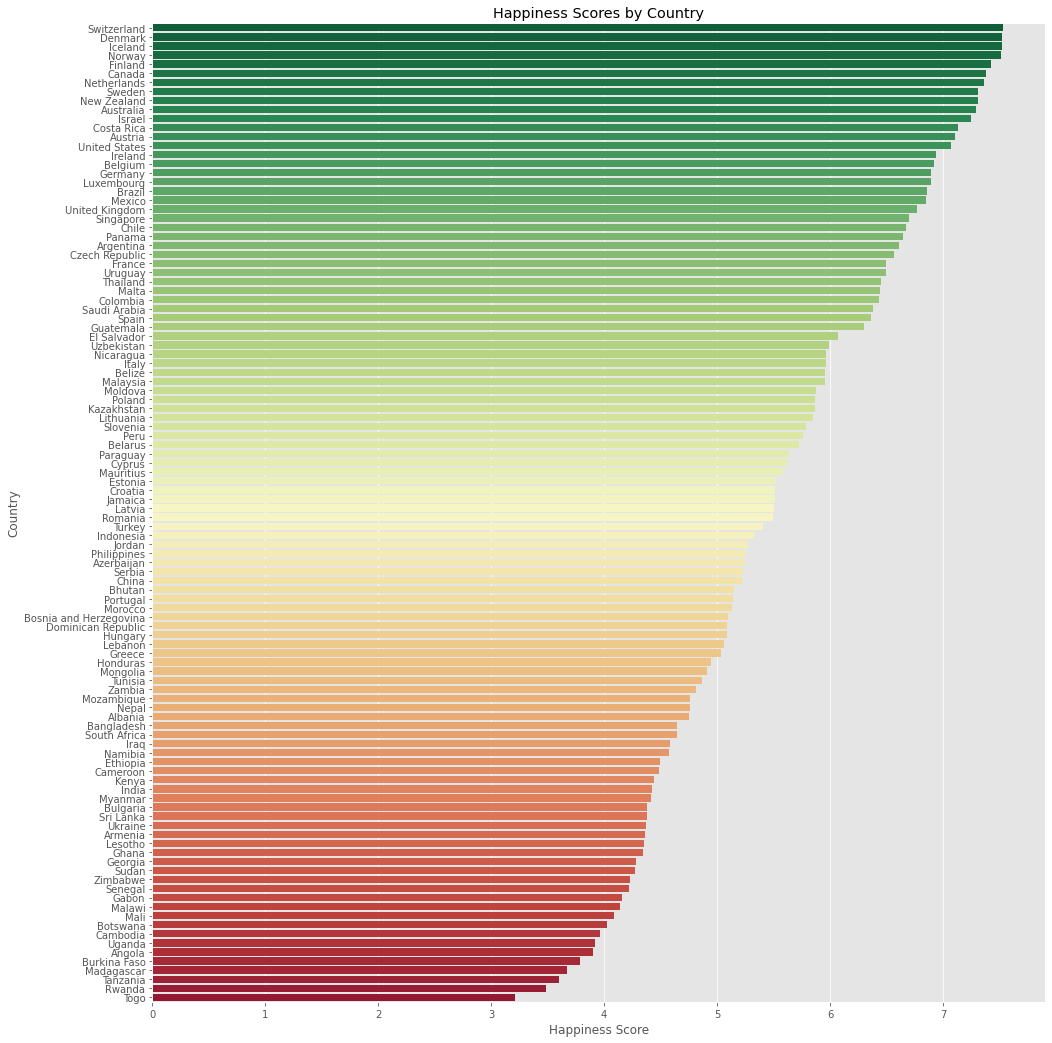

In [29]:
fig, ax = plt.subplots(figsize=figsize_default_vertical)
sns.barplot(
    ax=ax,
    data=df.groupby("Country")["Happiness Score"].agg(np.mean).sort_values(ascending=False).reset_index(),
    x="Happiness Score",
    y="Country",
    palette="RdYlGn_r"
)
plt.title("Happiness Scores by Country")

One thing we notice immediately is that many of the nations ranking highest in happiness seem to be from Europe. Meanwhile, a lot of the lowest ranking nations look like they are African nations. Lets further investigate this and visualize happiness by region. To do this, we'll have to grab some regional data about each country. Namely, we want to fetch what continent each country belongs to.

The following generates a dictionary of all continents and the countries in them by scraping statisticstimes.com's page on countries and continents.

In [30]:
continent_map = {}
region_map = {}

# The robots.txt at the time of execution gives no restrictions on scraping this page
page = requests.get("https://statisticstimes.com/geography/countries-by-continents.php")
soup = BeautifulSoup(page.content, "html.parser")

for row in soup.find_all("tr"):
    data = row.find_all("td", class_="name")
    if len(data) <= 1:
        continue
    if data[-1].text not in continent_map:
        continent_map[data[-1].text] = [data[0].text.lower()]
    else:
        continent_map[data[-1].text].append(data[0].text.lower())
    
    if data[1].text not in region_map:
        region_map[data[1].text] = [data[0].text.lower()]
    else:
        region_map[data[1].text].append(data[0].text.lower())

We can use it to create a new row for the continent of each and another row for the specific region it belongs to.

In [31]:
def get_location(country, map_):
    for l in map_.keys():
        if country in map_[l]:
            return l
    return np.NaN

df["Continent"] = df["Country"].apply(lambda x: get_location(x.lower(), continent_map))
df["Region"] = df["Country"].apply(lambda x: get_location(x.lower(), region_map))

Now we visualize by continent and region.


Text(0.5, 1.0, 'Happiness Scores by Continent')

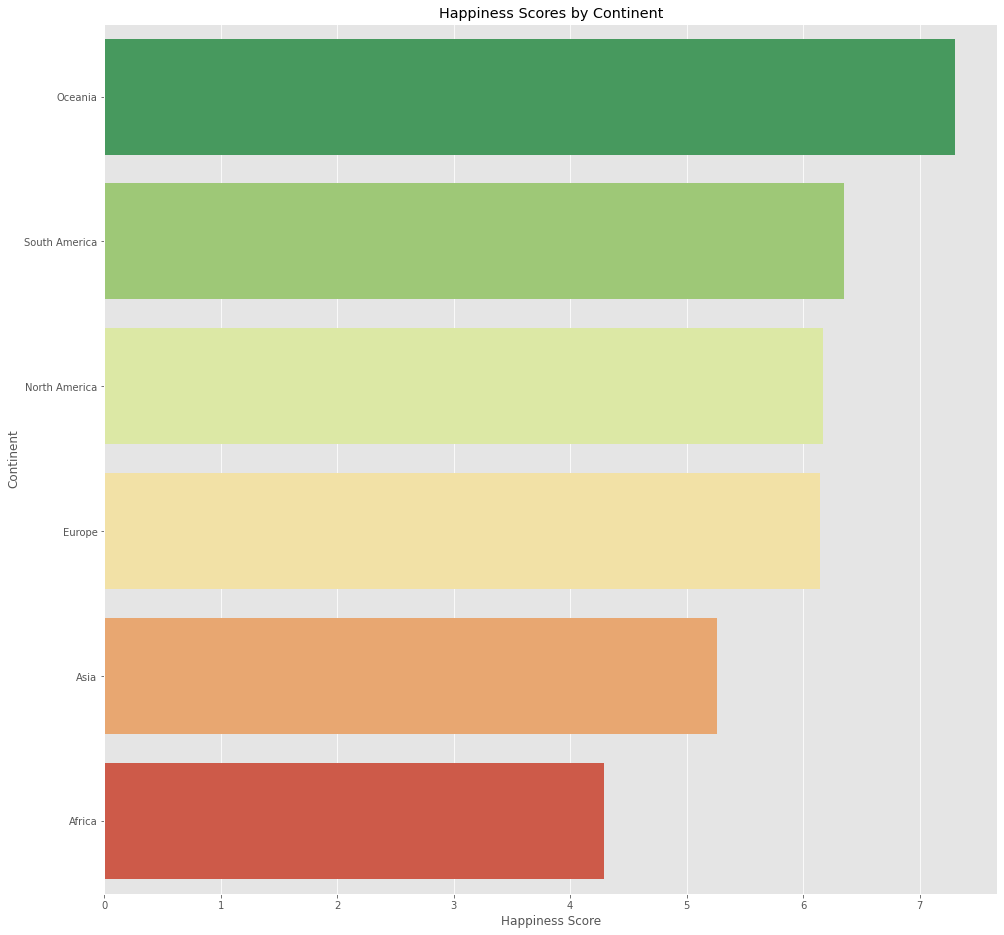

In [32]:
fig, ax = plt.subplots(figsize=figsize_default)
sns.barplot(
    ax=ax,
    data=df.groupby("Continent")["Happiness Score"].agg(np.mean).sort_values(ascending=False).reset_index(),
    x="Happiness Score",
    y="Continent",
    palette="RdYlGn_r"
)
plt.title("Happiness Scores by Continent")

Text(0.5, 1.0, 'Happiness Scores by Region')

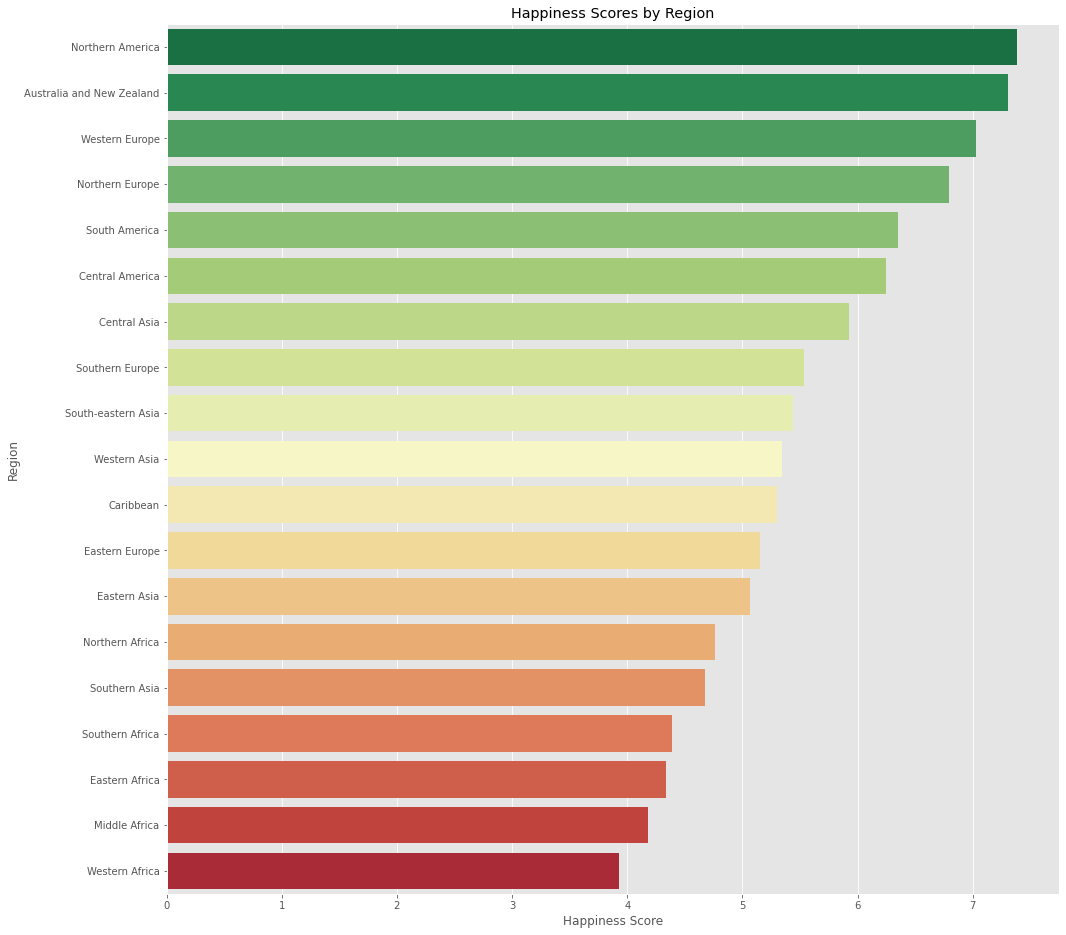

In [33]:
fig, ax = plt.subplots(figsize=figsize_default)
sns.barplot(
    ax=ax,
    data=df.groupby("Region")["Happiness Score"].agg(np.mean).sort_values(ascending=False).reset_index(),
    x="Happiness Score",
    y="Region",
    palette="RdYlGn_r"
)
plt.title("Happiness Scores by Region")

By looking at these we can clearly see that some regions are, in general, happier than others. As said above, African and Asian nations seem to be less happy than those from Europe and Oceania.

Now, we will look at the distribution taken by the Trade column

Text(0.5, 1.0, 'Distribution of Trade (% of GDP)')

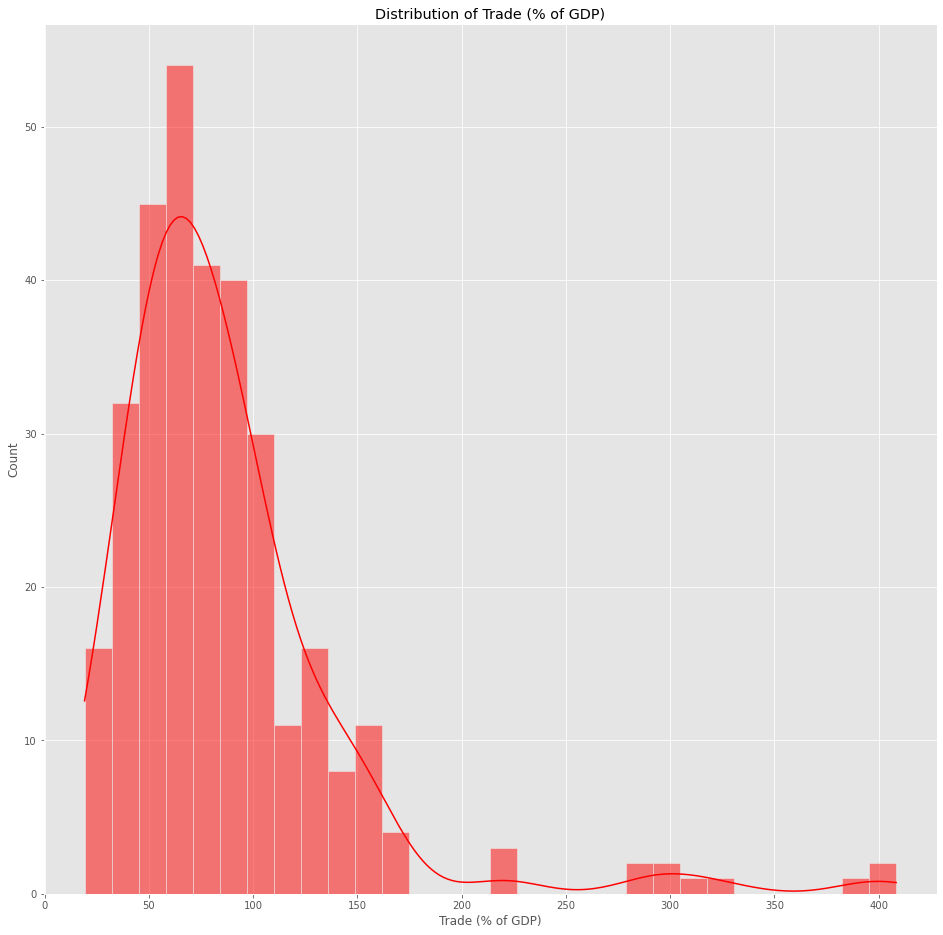

In [34]:
fig, ax = plt.subplots(figsize=figsize_default)
sns.histplot(
    ax=ax,
    data=df["Trade (% of GDP)"],
    kde=True,
    color="r"
)
plt.title("Distribution of Trade (% of GDP)")

We see that the data is appoximately normal apart from the quite significant right tail. As we cannot have negative values here, it makes sense that it is bounded to the left by 0 and thus right skewed. Heres what we get if we create a scatter plot of Trade vs Happiness:

Lets also look at trade by country on a map

Text(0.5, 1.0, 'Trade (% of GDP) by Country')

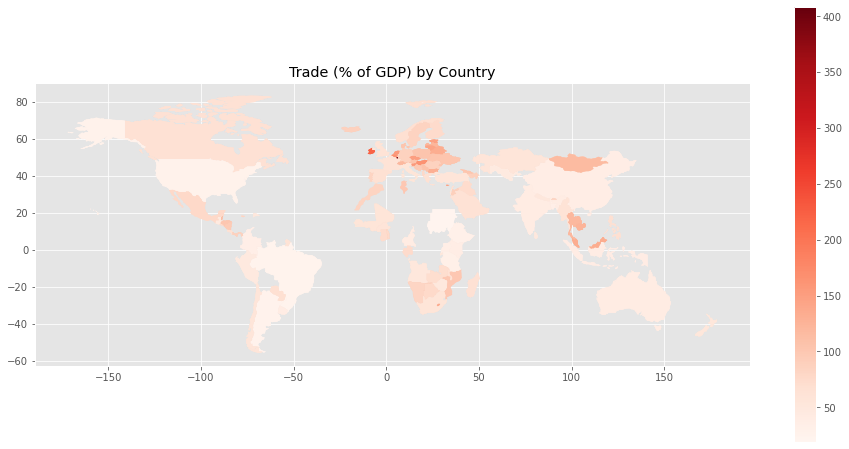

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
divider = make_axes_locatable(ax)
df_geo.plot(column="Trade (% of GDP)", ax=ax, legend=True, cmap="Reds")
plt.title("Trade (% of GDP) by Country")

We can see that, by Luxembourg's standards, nearly all nations have quite a low Trade (% of GDP) comaparatively. Lets remove Luxembourg from this graphic to get a better idea on how the rest relate to each other.

Text(0.5, 1.0, 'Trade (% of GDP) by Country')

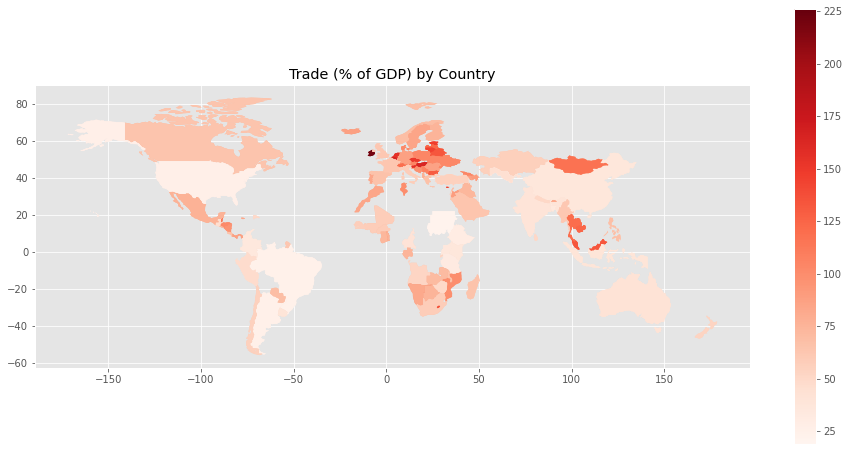

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
divider = make_axes_locatable(ax)
df_geo[df_geo["Trade (% of GDP)"] < 250].plot(column="Trade (% of GDP)", ax=ax, legend=True, cmap="Reds")
plt.title("Trade (% of GDP) by Country")

Still, there exist a few smaller European nation which dominate this economic feature and make the rest of countries pale by comparison.

Text(0.5, 1.0, 'Happiness by Trade (% of GDP)')

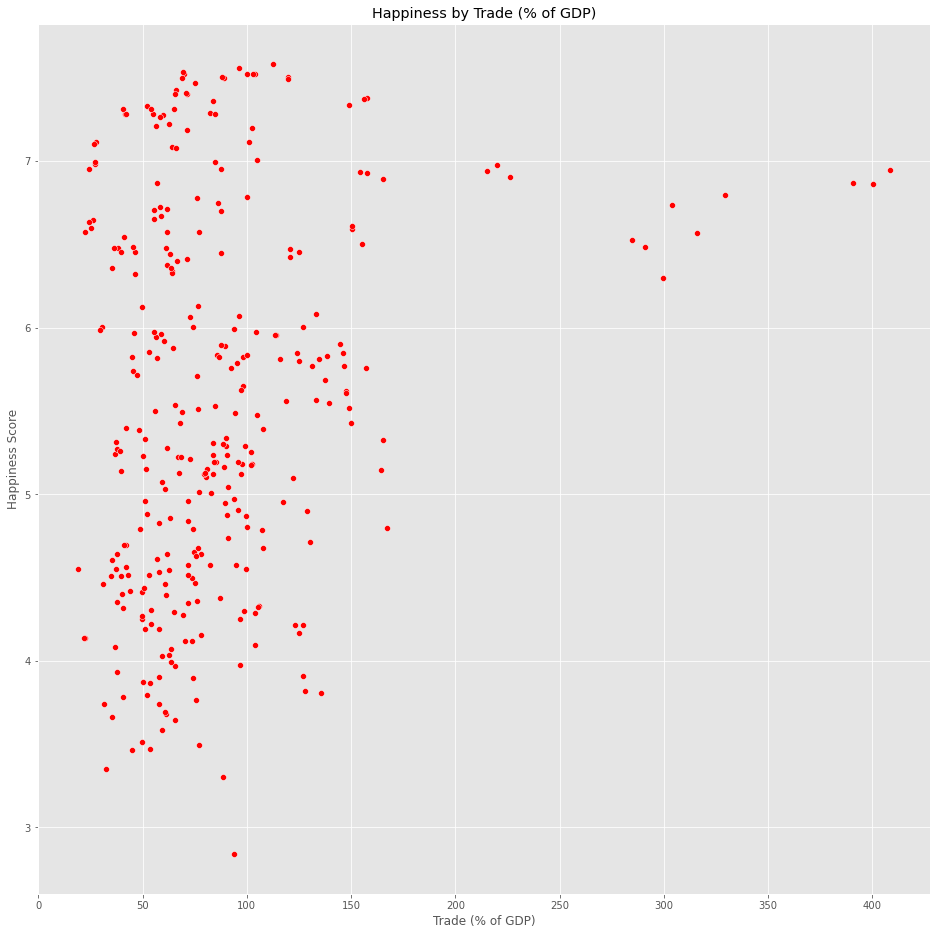

In [37]:
fig, ax = plt.subplots(figsize=figsize_default)
sns.scatterplot(
    ax=ax,
    data=df[["Happiness Score", "Trade (% of GDP)"]],
    y="Happiness Score",
    x="Trade (% of GDP)",
    color="r"
)
plt.title("Happiness by Trade (% of GDP)")

We can see that the really high trade values are obscuring the data pretty significantly. Lets look at a version where values greater than 1.5𝐼𝑄𝑅
more than the upper 75th percentile are dropped.

Text(0.5, 1.0, 'Happiness by Trade (% of GDP)')

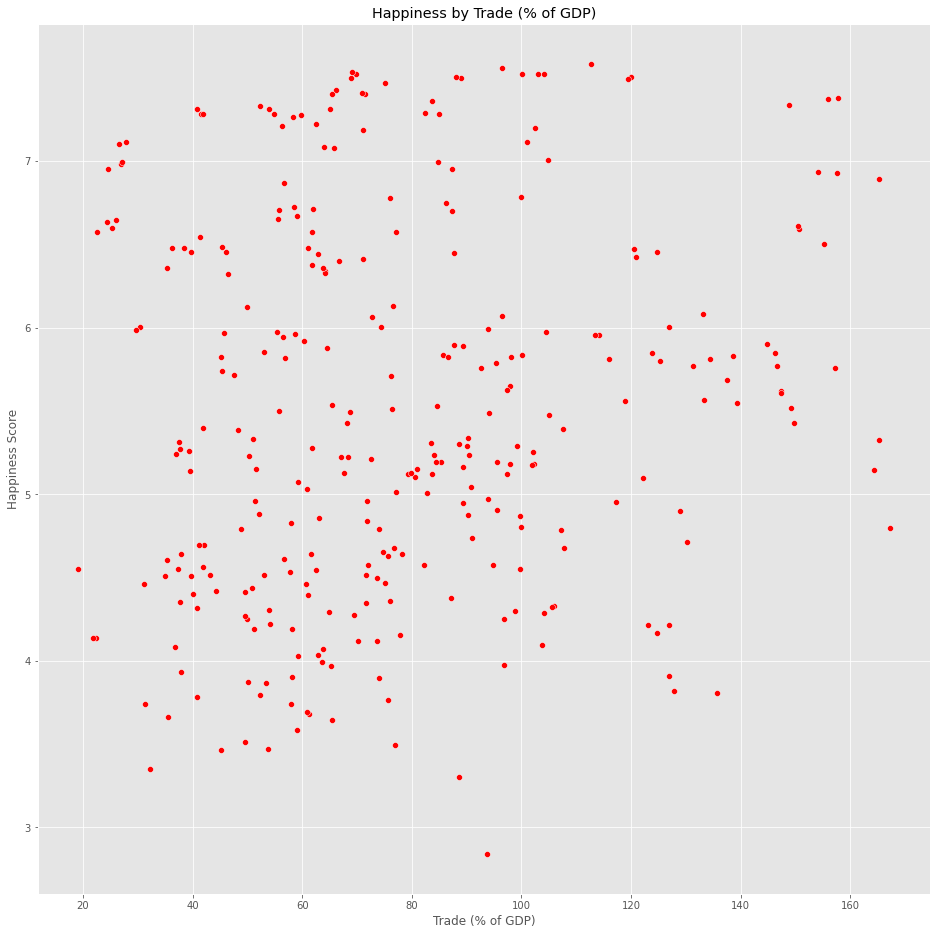

In [38]:
fig, ax = plt.subplots(figsize=figsize_default)
trade_wo_outliers = df[["Happiness Score", "Trade (% of GDP)"]][(df["Trade (% of GDP)"] <= df["Trade (% of GDP)"].quantile(.75) + 1.5*df["Trade (% of GDP)"].quantile([.25, .75]).diff().iloc[-1])]
sns.scatterplot(
    ax=ax,
    data=trade_wo_outliers,
    y="Happiness Score",
    x="Trade (% of GDP)",
    color="r"
)
plt.title("Happiness by Trade (% of GDP)")

Now, it looks a lot less influenced by outliers, but still without much correlation. Let's test that with a least-squares regression.


In [39]:
outcome, predictors = patsy.dmatrices(
    "Happiness ~ Trade",
    trade_wo_outliers.rename(columns={
        "Happiness Score":"Happiness",
        "Trade (% of GDP)":"Trade"
    })
)
mdl = sm.OLS(outcome, predictors)
results = mdl.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.836
Date:                Mon, 07 Jun 2021   Prob (F-statistic):             0.0286
Time:                        16:02:22   Log-Likelihood:                -474.42
No. Observations:                 308   AIC:                             952.8
Df Residuals:                     306   BIC:                             960.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1662      0.164     31.576      0.0

With an r-squared as low as 0.016, its hard to claim that there is any significant correlation between the data here but we will plot the best fit line anyways.


Text(0.5, 1.0, 'Happiness by Trade (% of GDP)')

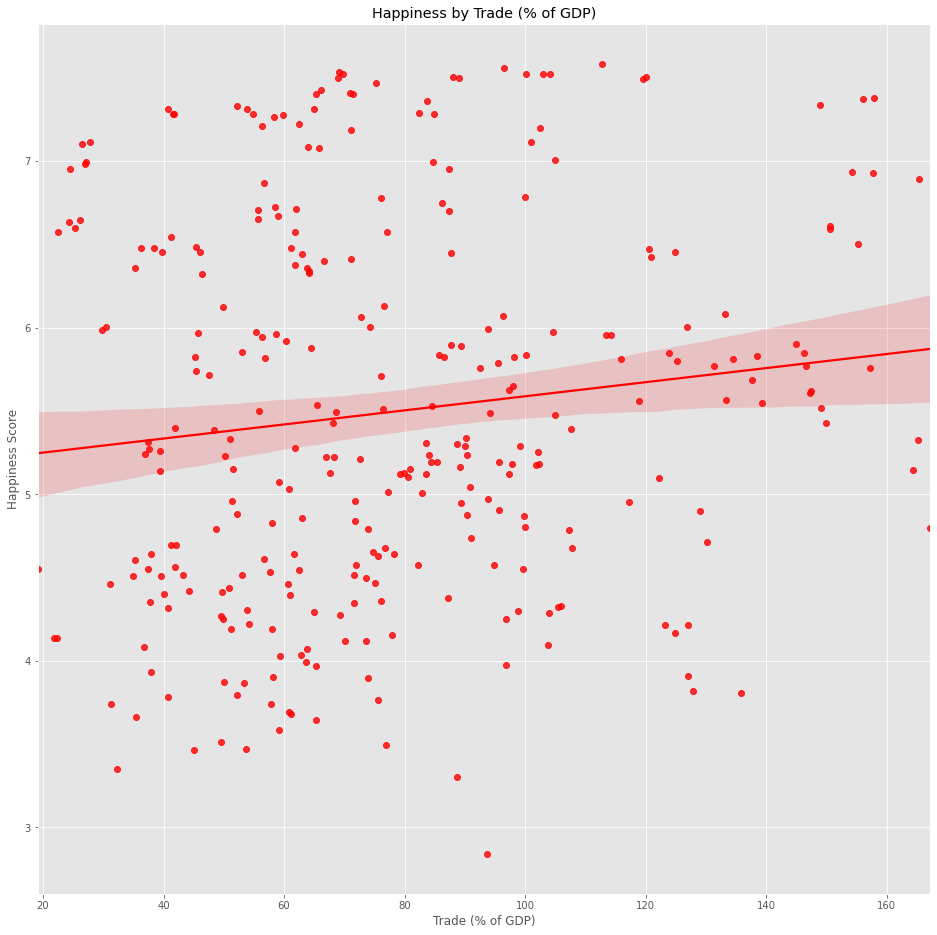

In [40]:
fig, ax = plt.subplots(figsize=figsize_default)
sns.regplot(
    ax=ax,
    data=trade_wo_outliers,
    y="Happiness Score",
    x="Trade (% of GDP)",
    color="r"
)
plt.title("Happiness by Trade (% of GDP)")

Next, we look at Primary Income, starting with a little formatting.


In [41]:
#making a sub-table that only has the happiness scores and Primary Income Payments and dropping the NaN values
pipdf = df[["Happiness Score", "Primary income payments (BoP, current US$)"]]
pipdf = pipdf.dropna(subset=['Happiness Score', 'Primary income payments (BoP, current US$)'])

# ensuring that there are no NaN values that I missed
pipdf[pipdf.isnull().any(axis=1)].shape[0]

0

We will perform a log transform on this column as much of the data differs by orders of magnitude and is hard to visualize.

In [42]:
#making the column names less gross
pipdf.columns = ['Happiness', 'PrimaryIncome']

#standardizing the values in the Primary Income Column to make them look less scary 
pipdf['PrimaryIncome'] = np.log(pipdf['PrimaryIncome'])

#To standardize the values, we use log which has affects on the column that we will take into account
pipdf.head()

,Happiness,PrimaryIncome
0,4.959,19.455017
1,4.655,19.373890
2,4.644,19.872665
3,4.033,22.527266
4,3.866,22.448614


We'll take a look at outliers first


<AxesSubplot:xlabel='PrimaryIncome'>

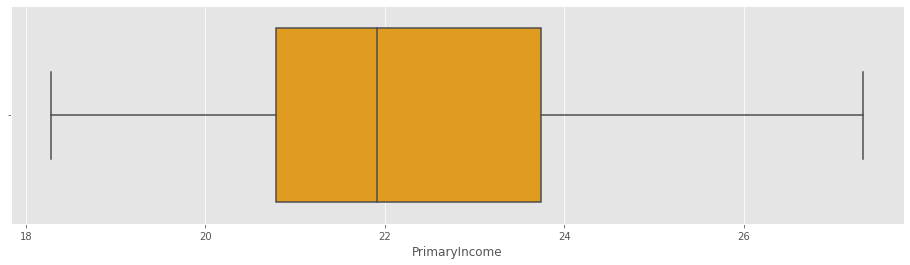

In [43]:
#taking a look for outliers 
lower, upper = np.percentile(pipdf['PrimaryIncome'], [25, 75])
lower, upper
iqr = upper - lower
iqr
lower_cutoff = lower - 1.5 * iqr
upper_cutoff = upper + 1.5 * iqr
lower_cutoff, upper_cutoff

#looking at the boxplot before removing outliers
plt.figure(figsize=(16, 4))
sns.boxplot(x='PrimaryIncome', data=pipdf, color="orange")

All of the data resides in the boxplot so no outliers to get rid of

<AxesSubplot:xlabel='PrimaryIncome', ylabel='Count'>

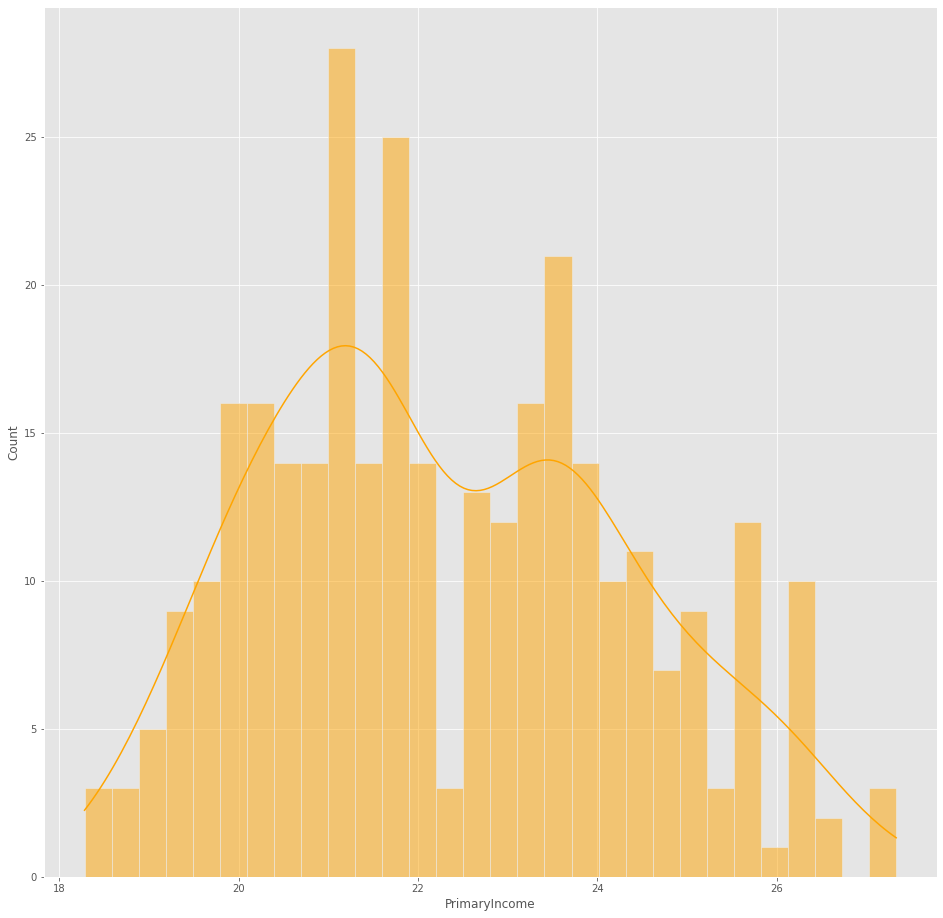

In [44]:
#taking a look at how often we see each primary income in the table
plt.figure(figsize=figsize_default)
sns.histplot(pipdf['PrimaryIncome'], bins=30, kde=True, color="orange")

Taking a look at this histogram, there appears to be a slight bimodal distribution around 21 and 23.5.

We then look at Income by country on a map

Text(0.5, 1.0, 'Primary income payments (BoP, current US$) by Country')

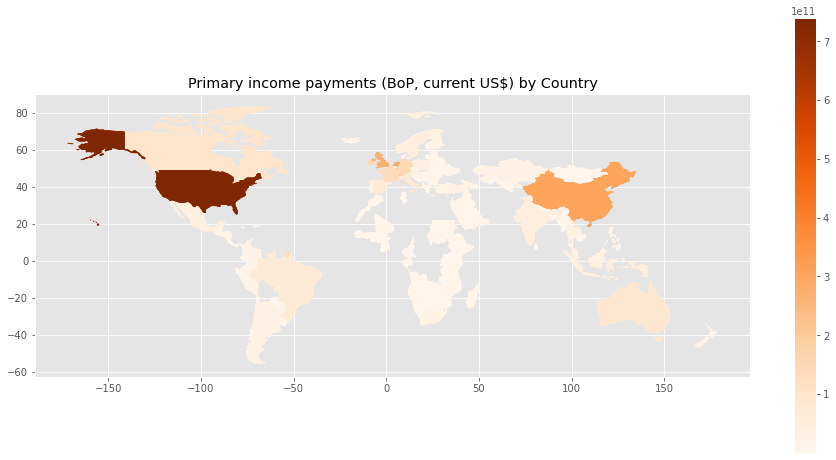

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
divider = make_axes_locatable(ax)
df_geo.plot(column="Primary income payments (BoP, current US$)", ax=ax, legend=True, cmap="Oranges")
plt.title("Primary income payments (BoP, current US$) by Country")

We see that The United States, China, The United Kingdom, and Denmark seem to have comparitively high primary incomes.

<AxesSubplot:xlabel='PrimaryIncome', ylabel='Happiness'>

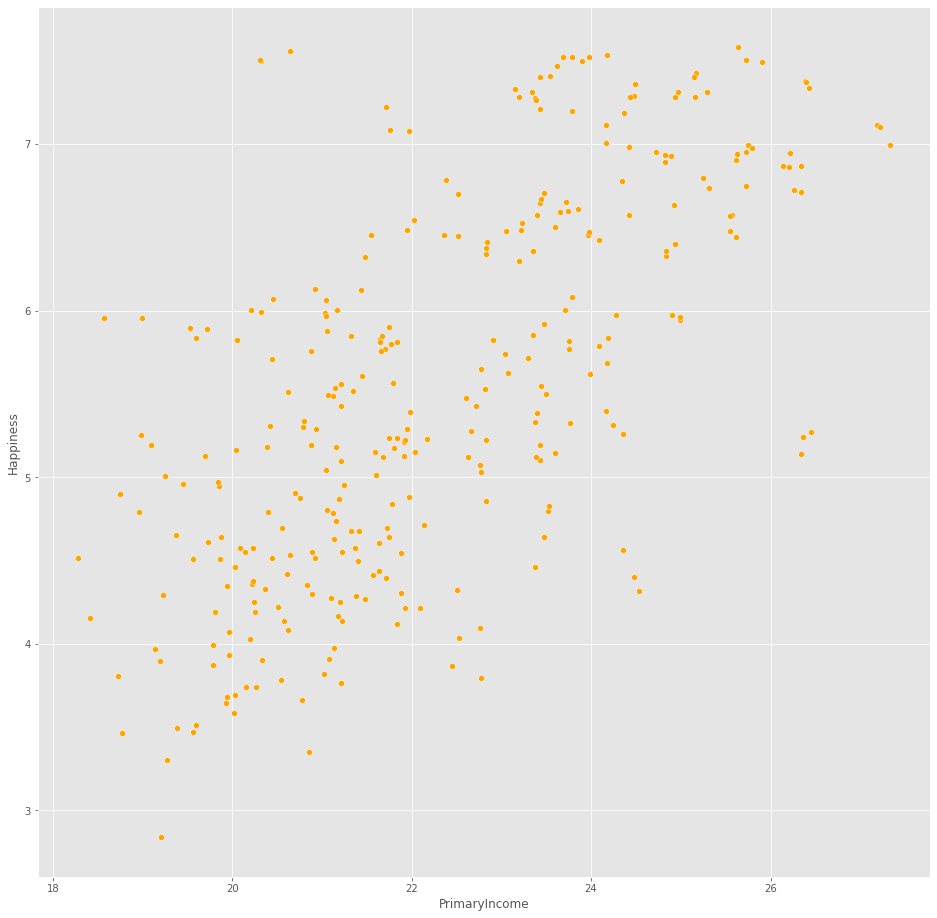

In [46]:
#looking at the relationship between primary income and happiness
plt.figure(figsize=figsize_default)
sns.scatterplot(x='PrimaryIncome', y='Happiness', data=pipdf, color="orange")

As an initial observation, there seems to be a slight positive correlation between primary income payments and happiness


In [47]:
#fitting the model and reviewing the results 
outcome, predictors = patsy.dmatrices('Happiness ~ PrimaryIncome', pipdf)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     253.3
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           2.73e-42
Time:                        16:02:23   Log-Likelihood:                -399.63
No. Observations:                 318   AIC:                             803.3
Df Residuals:                     316   BIC:                             810.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.8488      0.530     -5.375

The r-squared value is relatively high which suggests that some of the variability in the happiness score can be explained by the primary income payment measure. Also, the p-value is lower than our pre-determined alpha value of .05 which indicates that there is strong evidence that we can reject the null in favor of the alternative hypothesis for this specific factor.


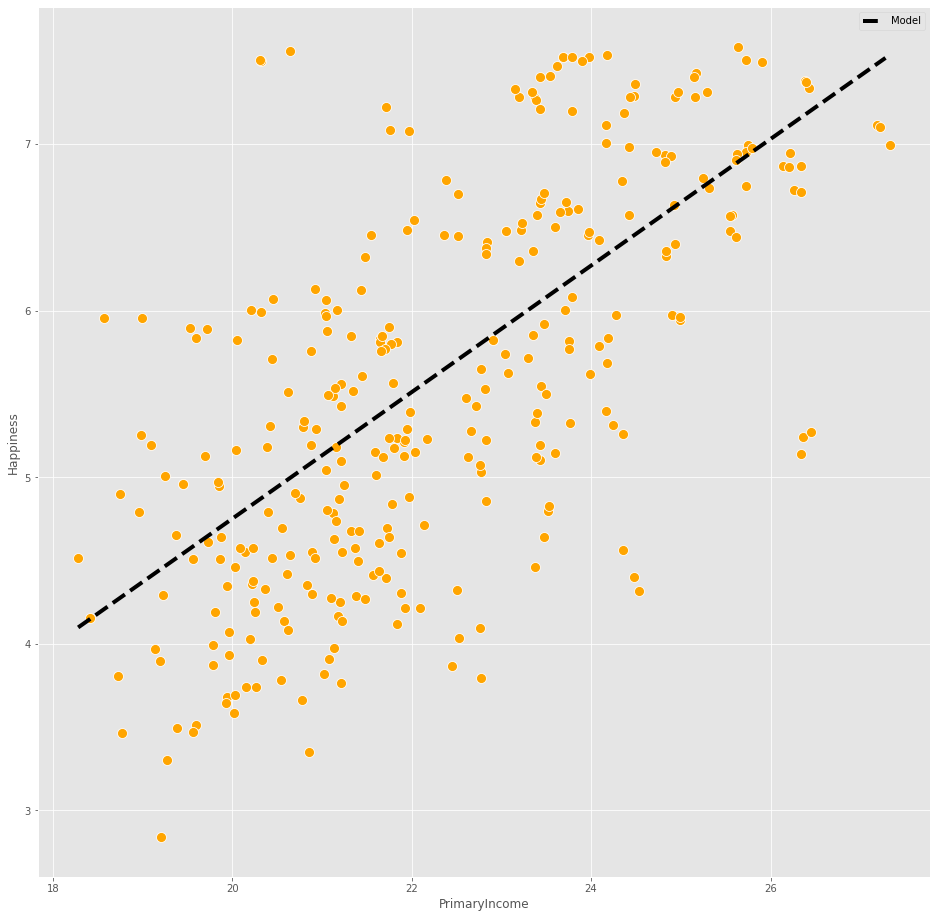

In [48]:
#This is the original scatterplot but with the model fit line over top.
plt.figure(figsize=figsize_default)
sns.scatterplot(x='PrimaryIncome', y='Happiness', data=pipdf, s=100, color="orange")

xs = np.arange(pipdf['PrimaryIncome'].min(), pipdf['PrimaryIncome'].max())
ys = .38 * xs + -2.848
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('PrimaryIncome')
plt.ylabel('Happiness')
plt.legend();

We will continue by investigating unemployment. Again, we will format a little before we plot.

In [49]:
unemployment = df[["Country", "Year","Unemployment, total (% of total labor force) (modeled ILO estimate)", "Happiness Score"]]

#extract by year
unemployment2015 = unemployment.loc[(unemployment.Year == 2015)]
unemployment2016 = unemployment.loc[(unemployment.Year == 2016)]
unemployment2017 = unemployment.loc[(unemployment.Year == 2017)]
unemployment

,Country,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Happiness Score
0,Albania,2015,17.190001,4.959
1,Albania,2016,15.420000,4.655
2,Albania,2017,13.620000,4.644
3,Angola,2015,7.260000,4.033
4,Angola,2016,7.200000,3.866
...,...,...,...,...
315,Zambia,2016,10.880000,4.795
316,Zambia,2017,11.630000,4.514
317,Zimbabwe,2015,5.290000,4.610
318,Zimbabwe,2016,5.240000,4.193


Lets compare the relative employment and happiness of countries in a given year. Here is 2017 for example.


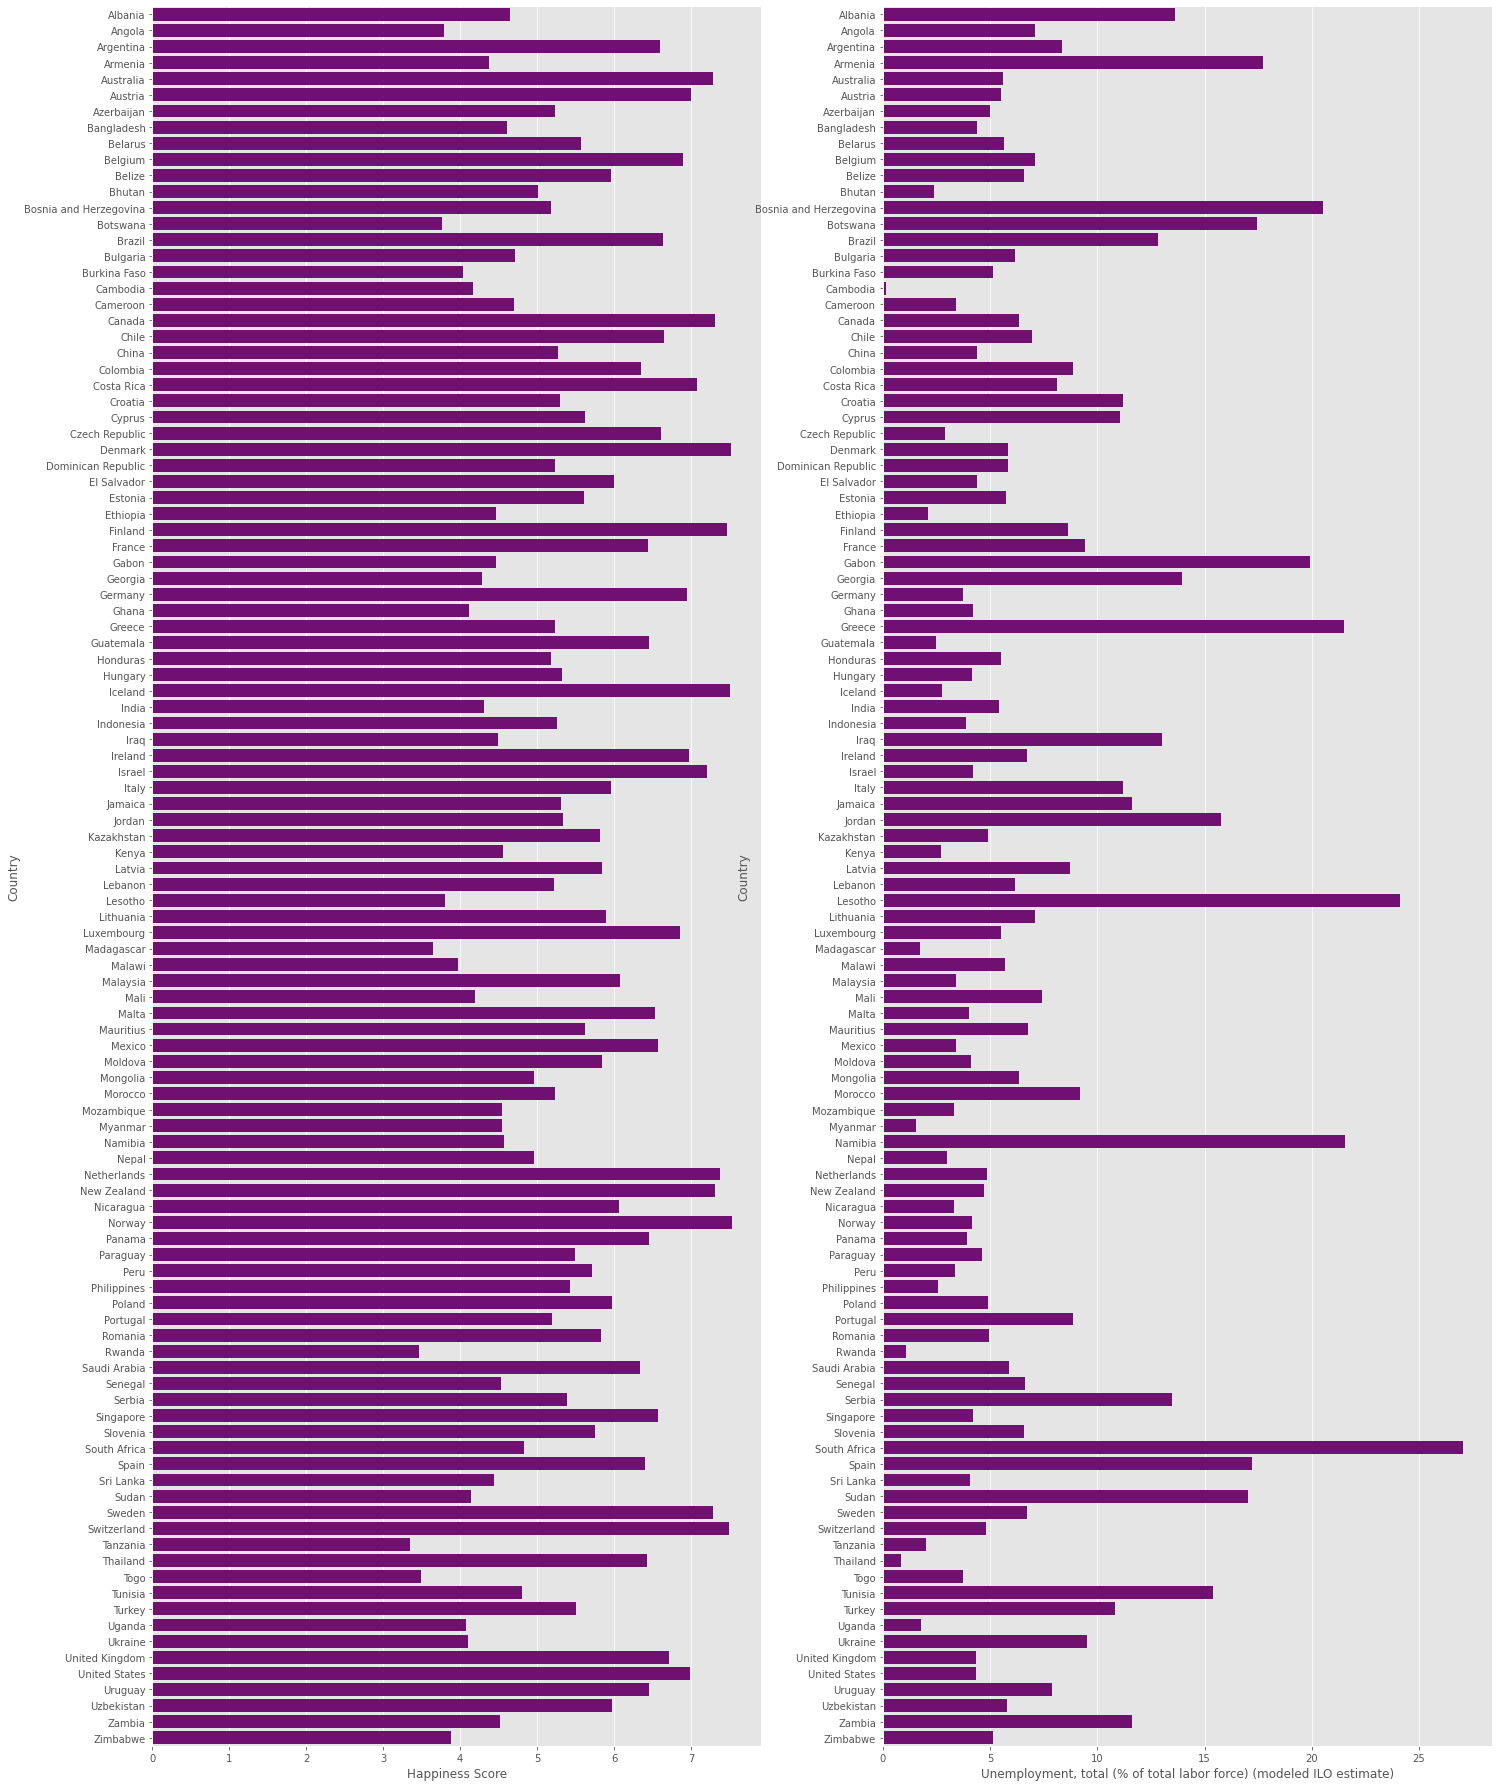

In [50]:
fig, ax =plt.subplots(1,2,  figsize=(24, 32))

#plot unemployment by country and plot happiness score by country
ax1 = sns.barplot(x="Happiness Score", y="Country", data=unemployment2017, orient='h', ax=ax[0], color="purple")
ax2 = sns.barplot(x="Unemployment, total (% of total labor force) (modeled ILO estimate)", y="Country", data=unemployment2017, orient='h', ax=ax[1], color="purple")

fig.show()

We notice, on a first glance, that there doesn't often seem to be too much similarity between the distributions. We can further investigate the relationship with a scatterplot and regression line.

<AxesSubplot:xlabel='Unemployment, total (% of total labor force) (modeled ILO estimate)', ylabel='Happiness Score'>

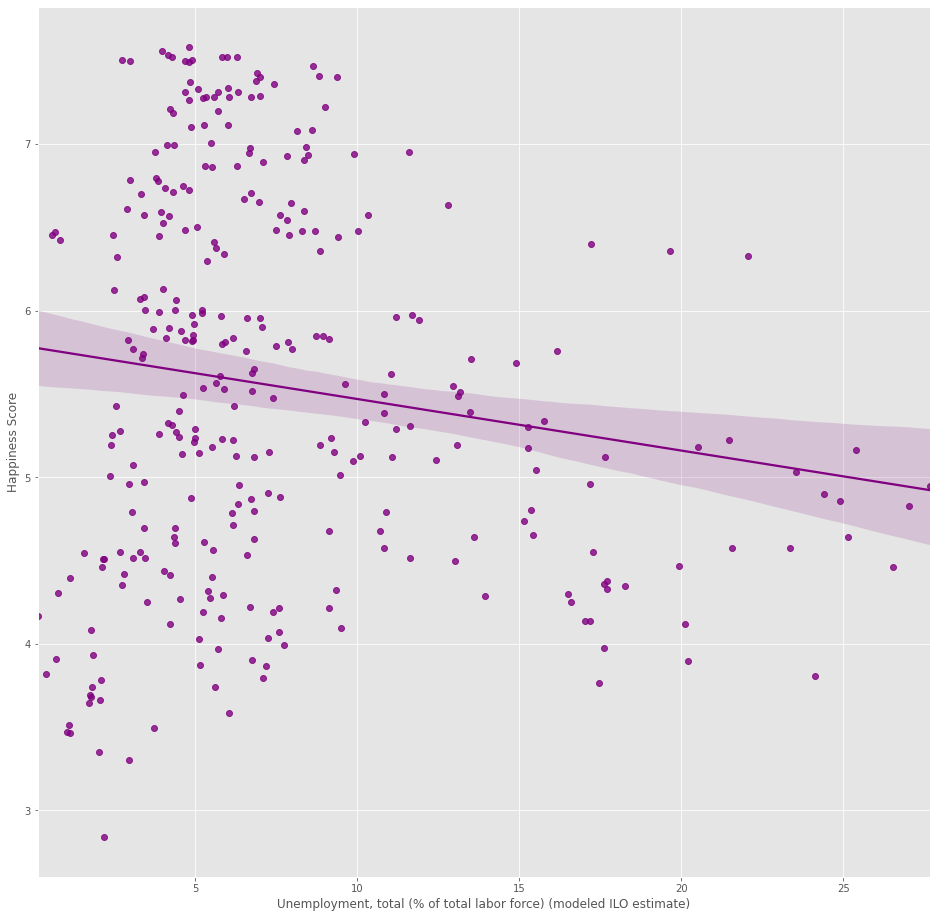

In [51]:
plt.figure(figsize=figsize_default)
sns.regplot(data=unemployment, x='Unemployment, total (% of total labor force) (modeled ILO estimate)', y = 'Happiness Score', color="purple")

As was maybe expected, there doesn't seem to be much correlation. This is reflected by the OLS model below.

In [52]:
outcome, predictors = patsy.dmatrices('Happiness ~ Unemployment', unemployment.rename(
    columns={
        "Unemployment, total (% of total labor force) (modeled ILO estimate)":"Unemployment",
        "Happiness Score":"Happiness"
    }
))
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     7.137
Date:                Mon, 07 Jun 2021   Prob (F-statistic):            0.00794
Time:                        16:02:27   Log-Likelihood:                -493.00
No. Observations:                 320   AIC:                             990.0
Df Residuals:                     318   BIC:                             997.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.7806      0.109     53.031   

The low r-squared value means that the observed data doesn't fit the regression model very well. However, the p-value is low enough that we can reject the null hypothesis which means that unemployment is statistically significant in terms of a country's happiness score. The effect that unemployment has on countries is that as unemployment goes up in a country, their overall happiness decreases a bit.

Despite this, we will still get more of a sense of the Unemployment feature by country via a map

Text(0.5, 1.0, 'Unemployment, total (% of total labor force) (modeled ILO estimate) by Country')

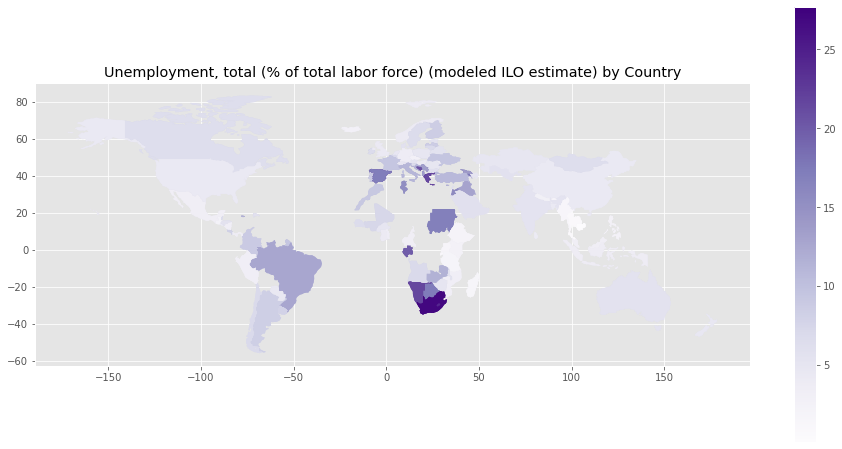

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
divider = make_axes_locatable(ax)
df_geo.plot(column="Unemployment, total (% of total labor force) (modeled ILO estimate)", ax=ax, legend=True, cmap="Purples")
plt.title("Unemployment, total (% of total labor force) (modeled ILO estimate) by Country")

Nations in Southern Africa and Southern Europe seem to have particularly high rates on unemployment during this time period.

Next, we'll look at GDP per capita. The following is again setup/cleanup as well as investigating some descriptive statistics.


In [54]:
gdp = df[["Country", "Year","GDP per capita (constant 2010 US$)", "Happiness Score"]]

#print(gdb)
#print(gdb.describe())

# SEPERATE into years
gdp2015 = gdp.loc[(gdp.Year == 2015)]
gdp2016 = gdp.loc[(gdp.Year == 2016)]
gdp2017 = gdp.loc[(gdp.Year == 2017)]
#################################################

# MAX GDP's per Year
maxGDP2015 = gdp2015["GDP per capita (constant 2010 US$)"].max()
maxGDP2016 = gdp2016["GDP per capita (constant 2010 US$)"].max()
maxGDP2017 = gdp2017["GDP per capita (constant 2010 US$)"].max()
#########################################################################

# MAX happiness per Year
maxHap2015 = gdp2015["Happiness Score"].max()
maxHap2016 = gdp2016["Happiness Score"].max()
maxHap2017 = gdp2017["Happiness Score"].max()
##############################################################################################

# SORT by GDP
gdpSort2015 = gdp2015.sort_values(by="Happiness Score", ignore_index=True)
gdpSort2016 = gdp2016.sort_values(by="Happiness Score", ignore_index=True)
gdpSort2017 = gdp2017.sort_values(by="Happiness Score", ignore_index=True)
###################################################################################

Some takeaways are the following:

- luxembourg has highest gdp 2015, 2016, and 2017 with happiness score 6.9, 6.8, 6.8
- Highest Happiness: Switzerland 7.587, Denmark 7.526, Norway 7.537 -> 2015, 2016, 2017
- luxembourg rank 89 2015 (Low 0 High 106)
- luxembourg rank 87 2016 (Low 0 High 106)
- luxembourg rank 90 2017 (Low 0 High 107)
- There seems to be an linear correlation

To have a closer look we will, similar to unemployment, plot GDP against happiness for each country as well as by country on a map.

Text(0.5, 1.0, 'GDP per capita (constant 2010 US$) by Country')

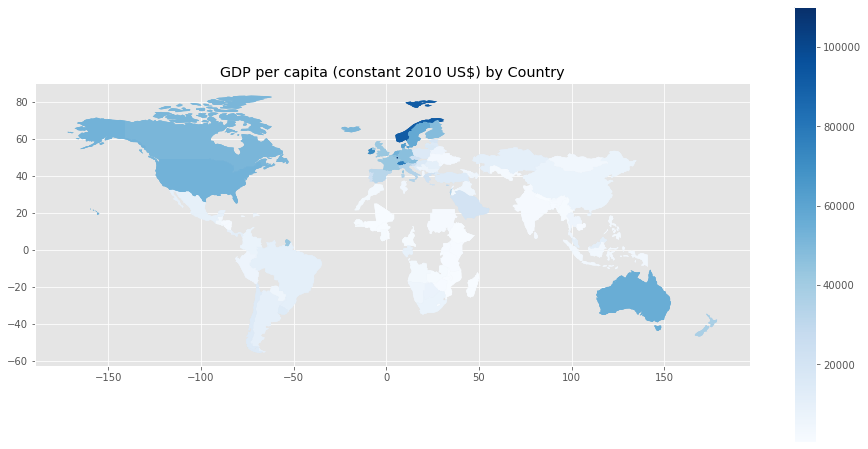

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
divider = make_axes_locatable(ax)
df_geo.plot(column="GDP per capita (constant 2010 US$)", ax=ax, legend=True, cmap="Blues")
plt.title("GDP per capita (constant 2010 US$) by Country")

Northern Europe, North America, and Oceania seem to have the largest GDPs per capita.

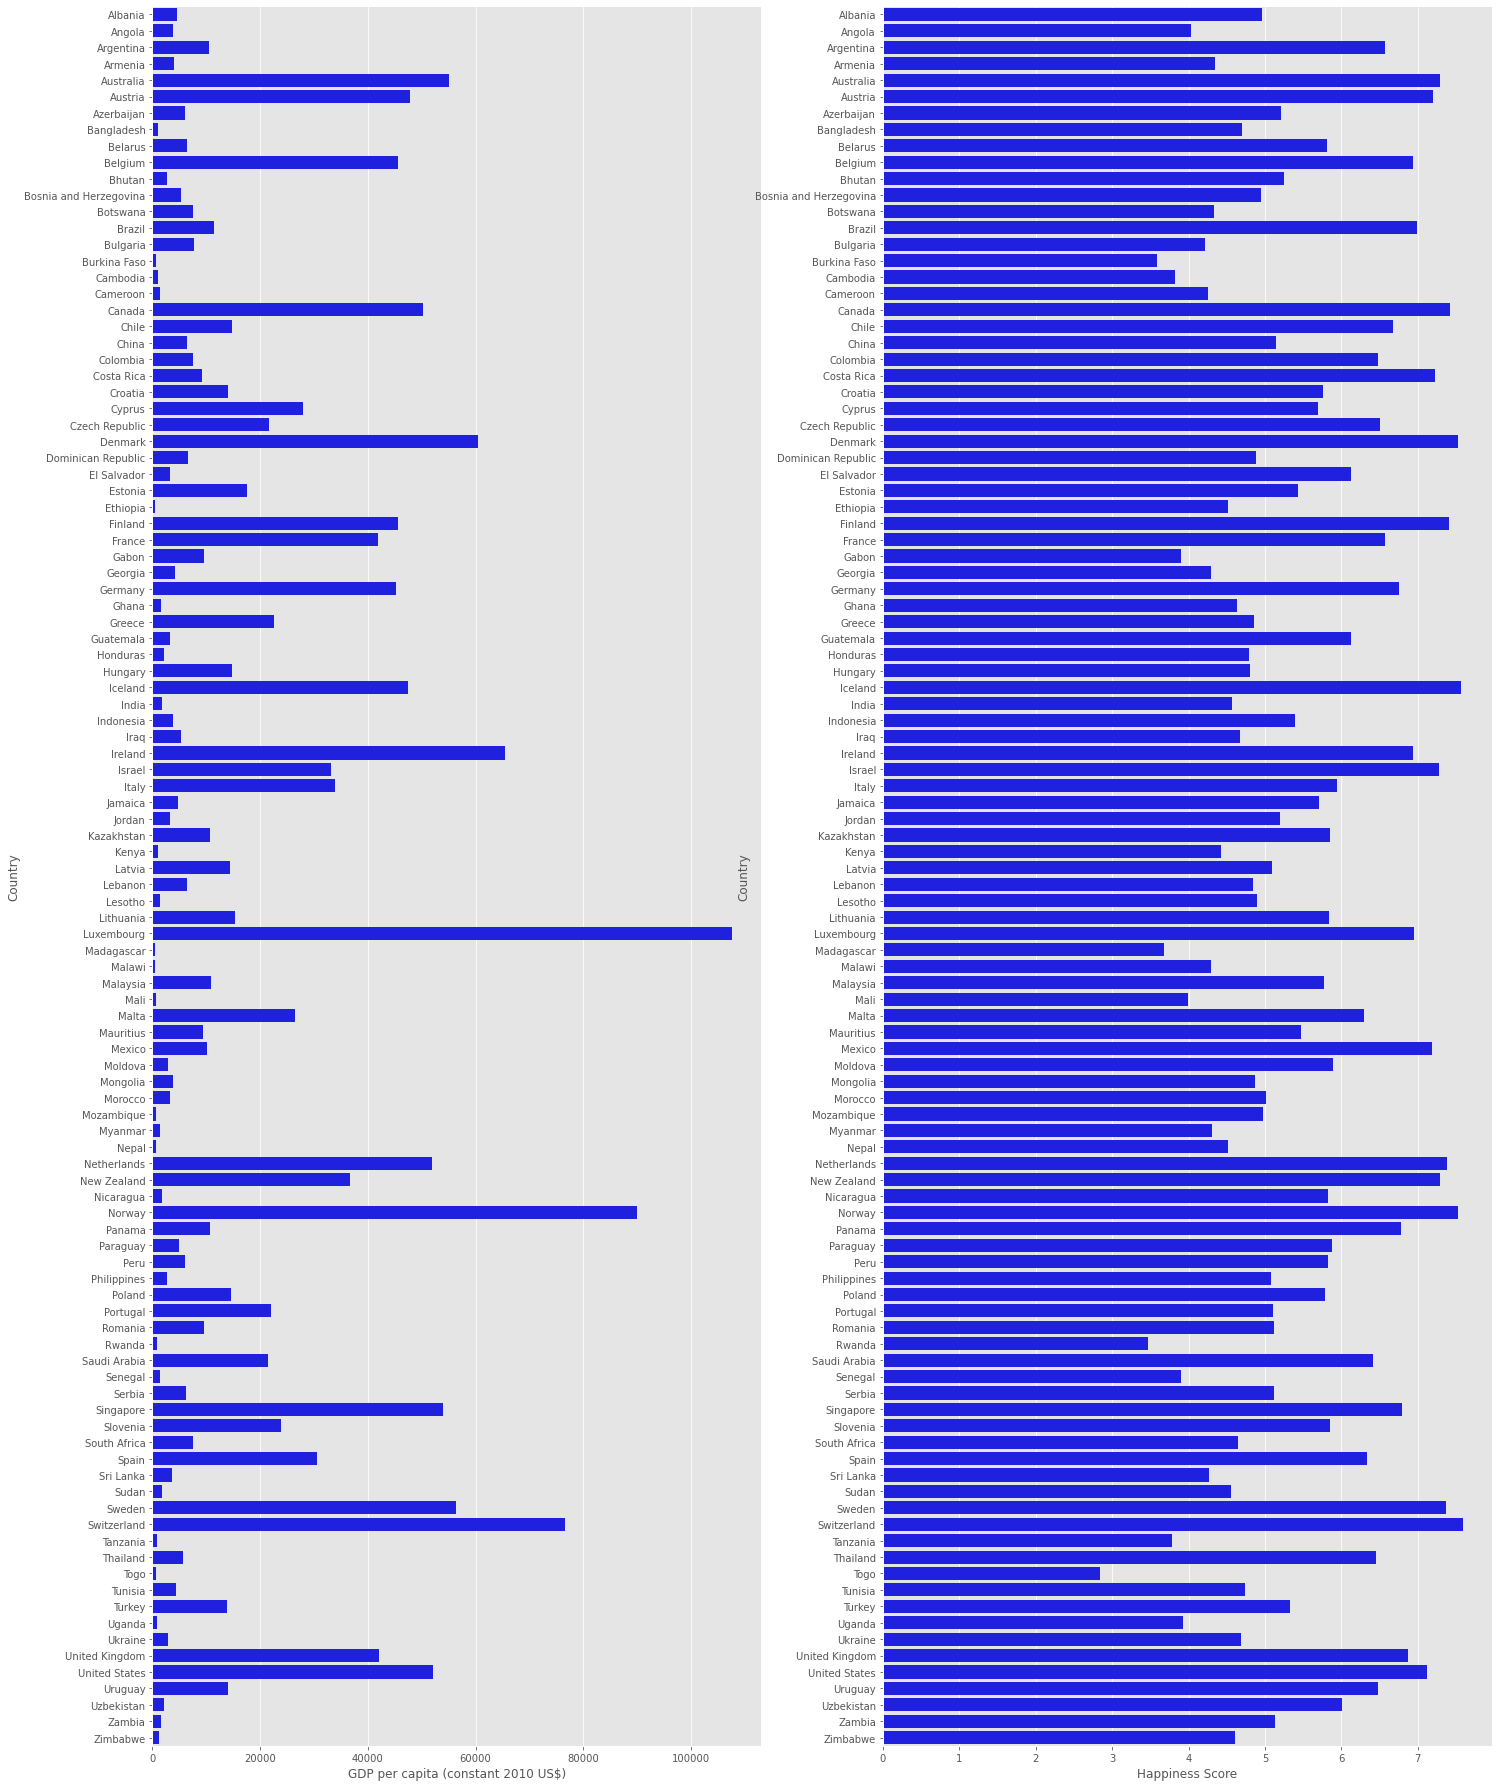

In [56]:
fig, ax =plt.subplots(1,2, figsize=(24, 32))

# PLOT GDP per country
ax1 = sns.barplot(x="GDP per capita (constant 2010 US$)", y="Country", data=gdp2015, orient='h', ax=ax[0], color="blue")
##############################################################################################

# PLOT Happiness Score per country
ax2 = sns.barplot(x="Happiness Score", y="Country", data=gdp2015, orient='h', ax=ax[1], color="blue")
###############################################################################

fig.show()

Because of some large GDP per capita values, it is a bit hard to tell if these distributions are similar. Let's generate a scatter plot.

We will take the log of GDP to account for the exponential trend we noticed earlier.

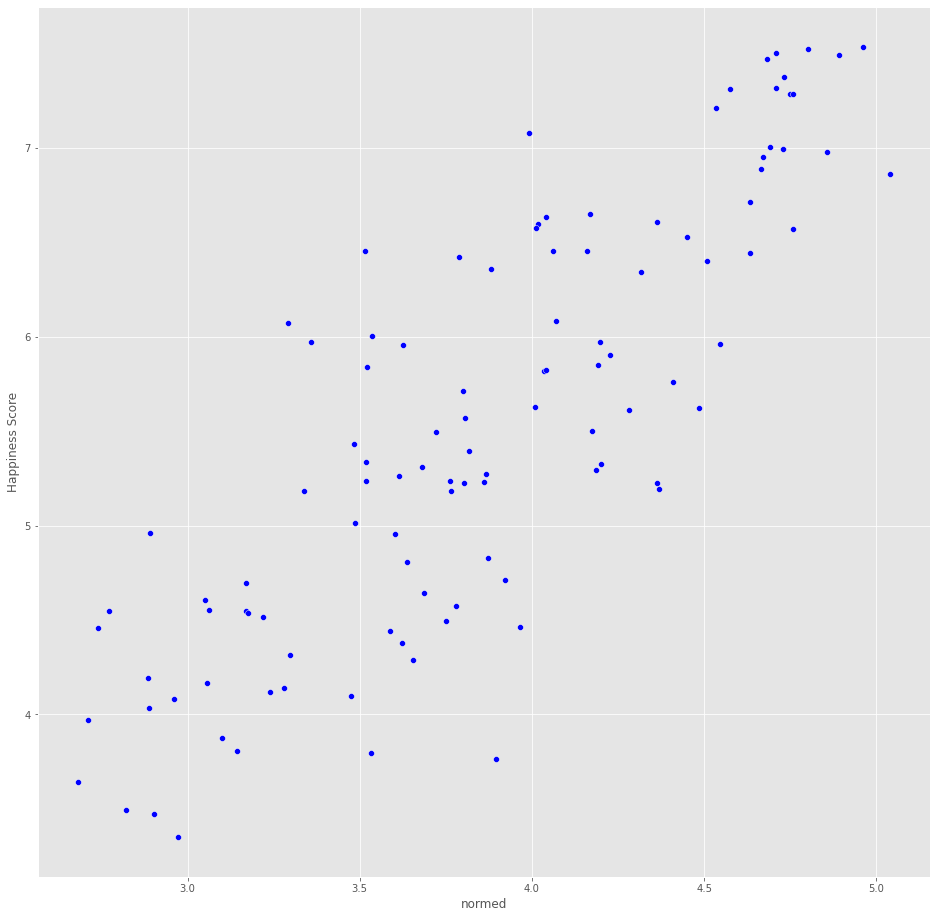

In [57]:
gdp2017 = gdp2017.assign(normed=np.log10(gdp2017["GDP per capita (constant 2010 US$)"]))
plt.figure(figsize=figsize_default)
ax2017 = sns.scatterplot(y="Happiness Score", x="normed", data=gdp2017, color="b")

There looks to be a reasonable strong correlation. We'll run an OLS model and plot the regression line to get more details.

In [58]:
outcome, predictors = patsy.dmatrices('Happy ~ normed', gdp2017.rename(
    columns={
        'GDP per capita (constant 2010 US$)' : 'GDP', "Happiness Score" : "Happy"
    }, errors='raise')
)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Happy   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     240.9
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           4.71e-29
Time:                        16:02:31   Log-Likelihood:                -101.80
No. Observations:                 108   AIC:                             207.6
Df Residuals:                     106   BIC:                             213.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4093      0.388     -1.055      0.2

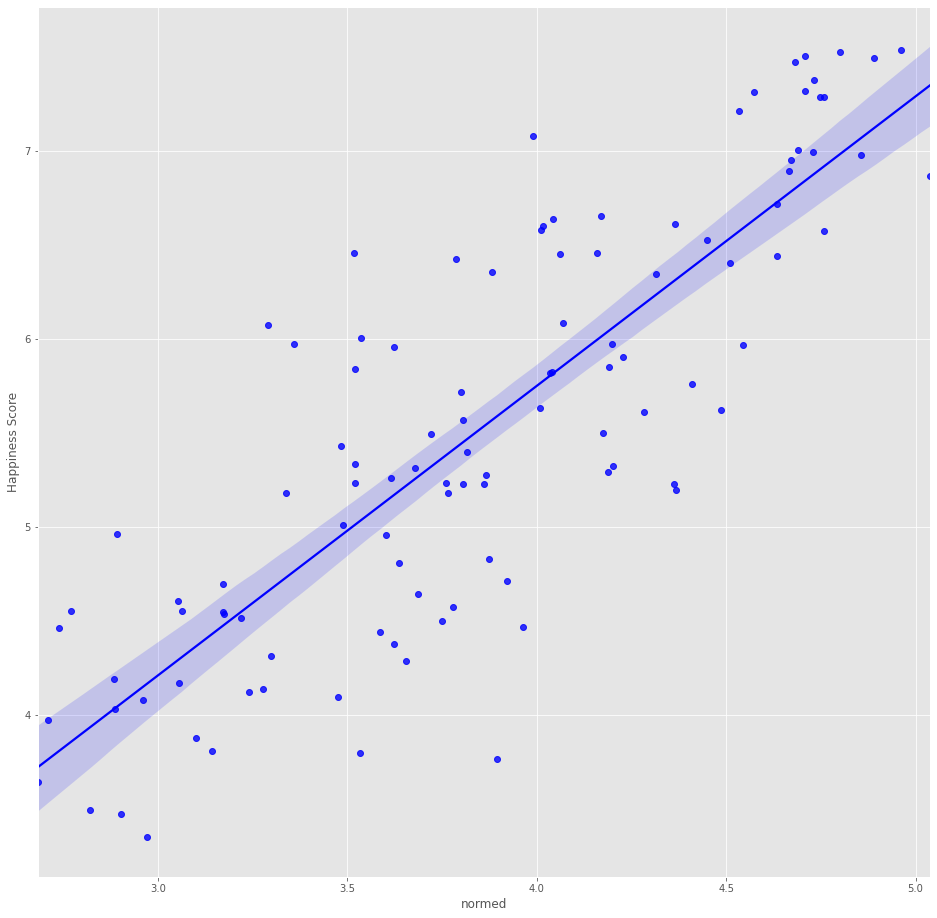

In [59]:
plt.figure(figsize=figsize_default)
ax2017 = sns.regplot(y="Happiness Score", x="normed", data=gdp2017, color="blue")

It is clear that there is a correlation between the GDP of a country and its overall happiness rating. The trend follows
a linear progression with a coefficient rating between Happiness and GDP being 1.5 and the standard error being only 0.09. Meaning the higher 
the GDP of a country the higher the happiness rating, but it is not purely a one to one ratio meaning the country with the highest GDP
does not have the highest happiness rating but it is still ranked in the top percentile.


Finally, we will look at tax revenue, starting with a histogram of the tax revenue distribution.

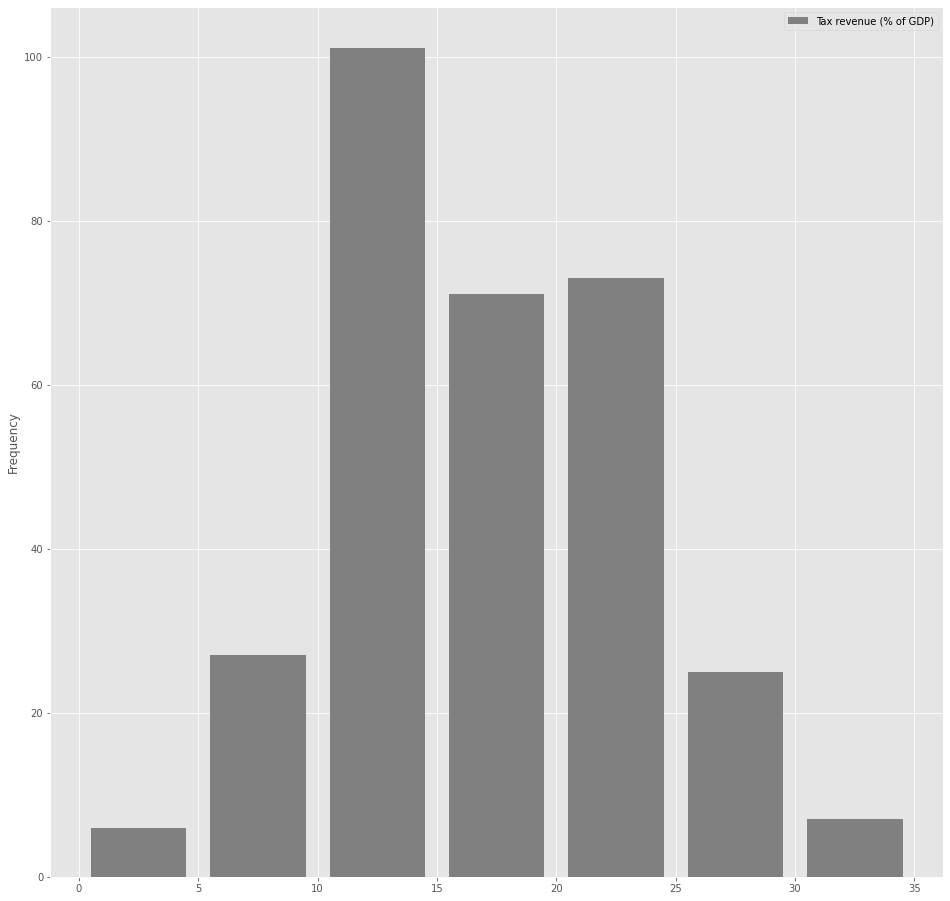

In [60]:
#Tax revenue Histogrtam with Outliers
df[['Tax revenue (% of GDP)']].plot(kind='hist',bins=[0,5,10,15,20,25,30,35], rwidth=0.8, figsize=figsize_default, color="gray")
plt.show()

Text(0.5, 1.0, 'Tax revenue (% of GDP) by Country')

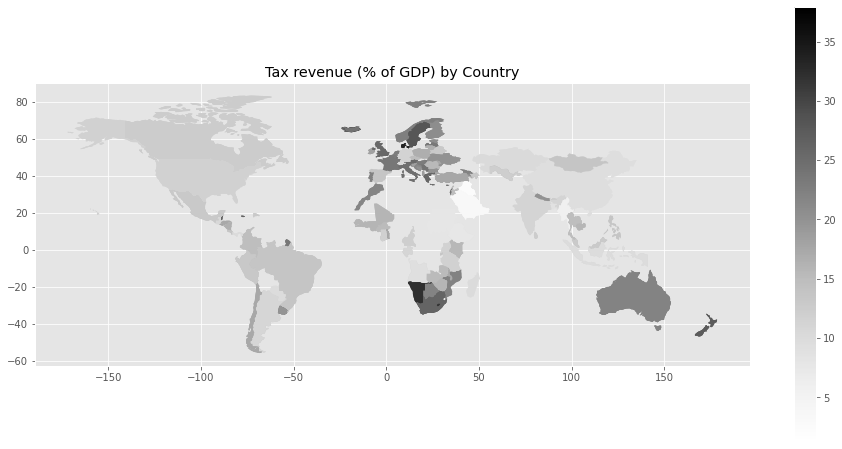

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
divider = make_axes_locatable(ax)
df_geo.plot(column="Tax revenue (% of GDP)", ax=ax, legend=True, cmap="Greys")
plt.title("Tax revenue (% of GDP) by Country")

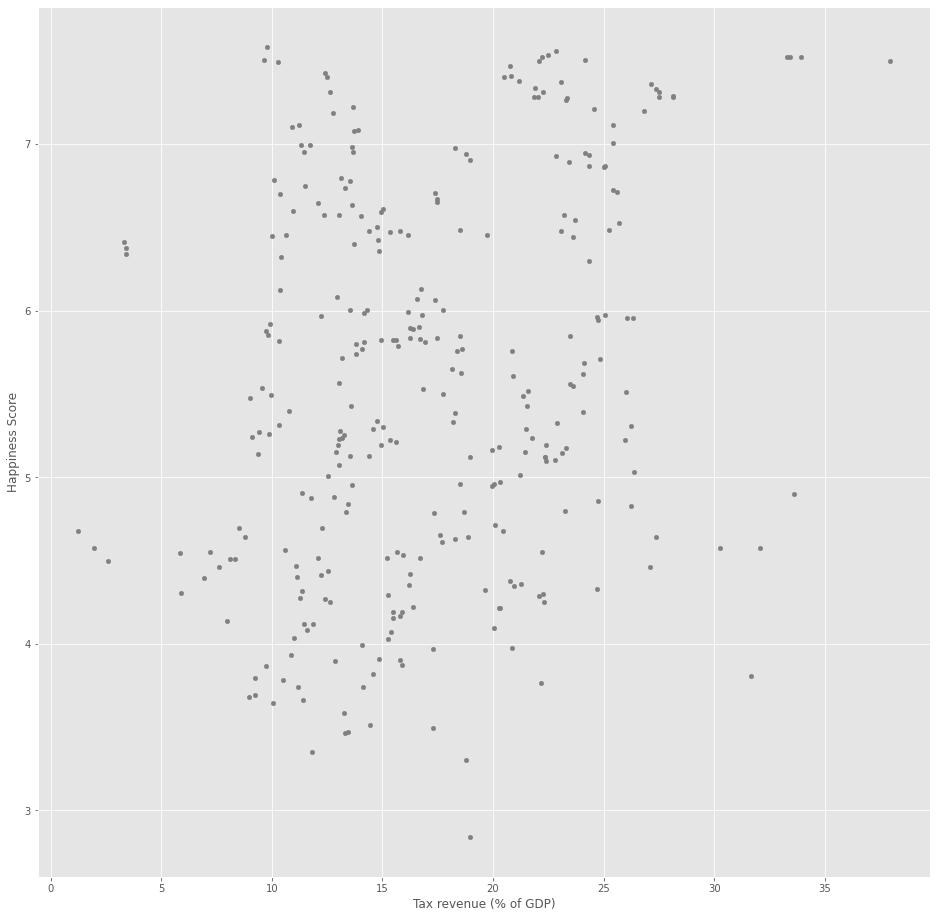

In [62]:
# Scatter Plot of Tax Revenue vs. Happiness Score With Outliers
df.plot(kind='scatter',x='Tax revenue (% of GDP)',y='Happiness Score', color='grey', figsize=figsize_default)
plt.show()

There doesn't seem to be much of a correlation here, but we will keep investigating.

In [63]:
outcome, predictors = patsy.dmatrices('Happy ~ Tax', df.rename(
    columns={
        'Tax revenue (% of GDP)' : 'Tax', "Happiness Score" : "Happy"
    }, errors='raise')
)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Happy   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     21.93
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           4.23e-06
Time:                        16:02:32   Log-Likelihood:                -474.03
No. Observations:                 311   AIC:                             952.1
Df Residuals:                     309   BIC:                             959.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7406      0.185     25.597      0.0

<AxesSubplot:xlabel='Tax revenue (% of GDP)', ylabel='Happiness Score'>

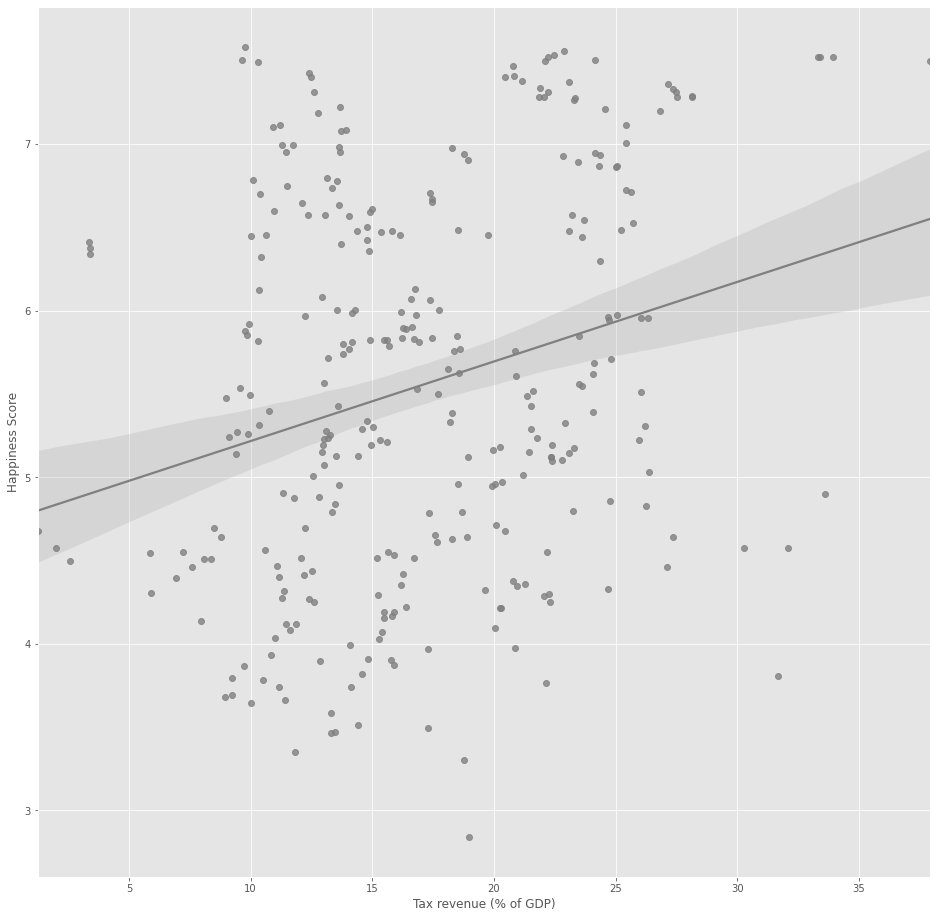

In [64]:
plt.figure(figsize=figsize_default)
sns.regplot(data=df, x="Tax revenue (% of GDP)", y="Happiness Score", color="gray")

### Pulling them all together

We will first generate a scatter matric for our 5 focused economic features to look for any co-linearity.

array([[<AxesSubplot:xlabel='Unemployment', ylabel='Unemployment'>,
        <AxesSubplot:xlabel='Tax', ylabel='Unemployment'>,
        <AxesSubplot:xlabel='GDP', ylabel='Unemployment'>,
        <AxesSubplot:xlabel='Income', ylabel='Unemployment'>],
       [<AxesSubplot:xlabel='Unemployment', ylabel='Tax'>,
        <AxesSubplot:xlabel='Tax', ylabel='Tax'>,
        <AxesSubplot:xlabel='GDP', ylabel='Tax'>,
        <AxesSubplot:xlabel='Income', ylabel='Tax'>],
       [<AxesSubplot:xlabel='Unemployment', ylabel='GDP'>,
        <AxesSubplot:xlabel='Tax', ylabel='GDP'>,
        <AxesSubplot:xlabel='GDP', ylabel='GDP'>,
        <AxesSubplot:xlabel='Income', ylabel='GDP'>],
       [<AxesSubplot:xlabel='Unemployment', ylabel='Income'>,
        <AxesSubplot:xlabel='Tax', ylabel='Income'>,
        <AxesSubplot:xlabel='GDP', ylabel='Income'>,
        <AxesSubplot:xlabel='Income', ylabel='Income'>]], dtype=object)

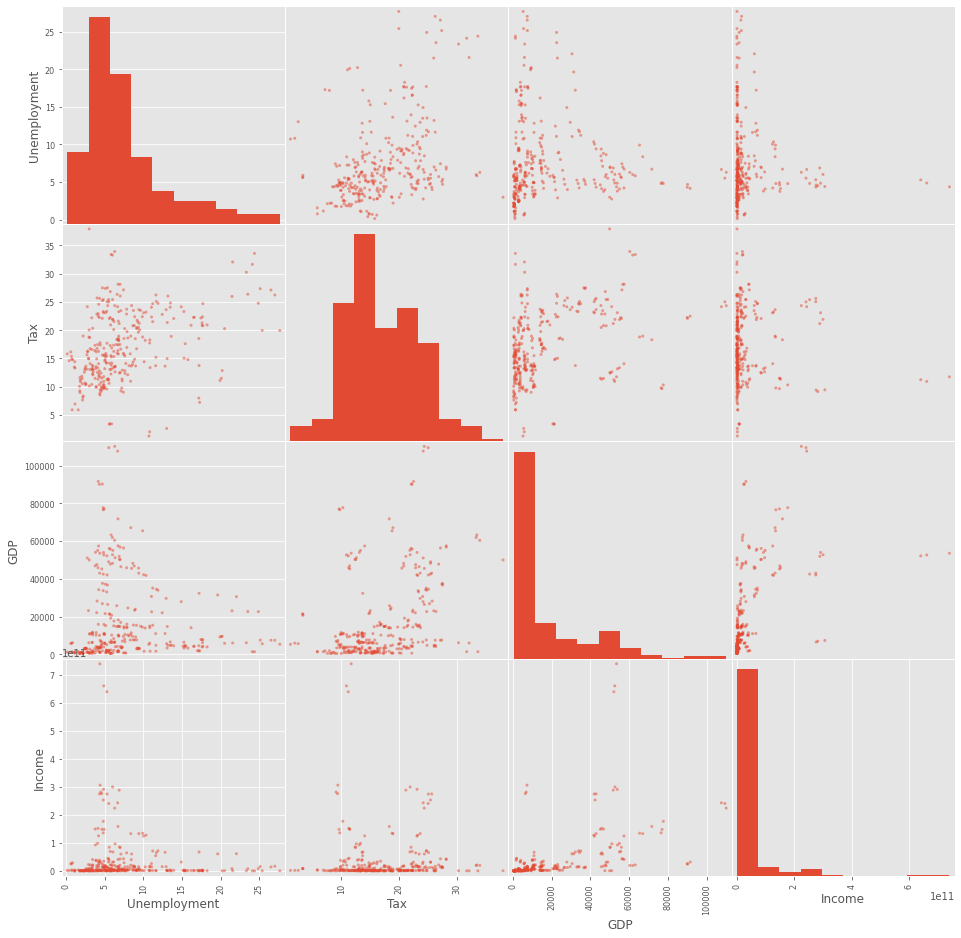

In [65]:
pd.plotting.scatter_matrix(df[df.columns[2:6]].rename(columns={
    "Happiness Score":"Happiness",
    "GDP per capita (constant 2010 US$)":"GDP",
    "Primary income payments (BoP, current US$)":"Income",
    "Trade (% of GDP)":"Trade",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)":"Unemployment",
    "Tax revenue (% of GDP)":"Tax"
}), figsize=(16,16))

There seems to be little correlation between any two of the features. This is  hopefully an indicator that no multicollinearity that could hurt the following multiple regression exists.

In [66]:
for col in df.columns[2:6]:
    df[col + "_logged"] = df[col].apply(np.log)

outcome, predictors = patsy.dmatrices("Happiness ~ GDP + Income + Trade + Unemployment + Tax", df.rename(columns={
    "Happiness Score":"Happiness",
    "GDP per capita (constant 2010 US$)_logged":"GDP",
    "Primary income payments (BoP, current US$)_logged":"Income",
    "Trade (% of GDP)":"Trade",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)":"Unemployment",
    "Tax revenue (% of GDP)_logged":"Tax"
}))
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     190.7
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           2.49e-91
Time:                        16:02:33   Log-Likelihood:                -261.60
No. Observations:                 309   AIC:                             535.2
Df Residuals:                     303   BIC:                             557.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1858      0.456     -0.408   

In [67]:
outcome, predictors = patsy.dmatrices("Happiness ~ GDP + Income", df.rename(columns={
    "Happiness Score":"Happiness",
    "GDP per capita (constant 2010 US$)_logged":"GDP",
    "Primary income payments (BoP, current US$)_logged":"Income"
}))
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     343.7
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           6.57e-80
Time:                        16:02:33   Log-Likelihood:                -309.16
No. Observations:                 318   AIC:                             624.3
Df Residuals:                     315   BIC:                             635.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9472      0.418     -2.267      0.0

# Ethics & Privacy

The data used in this project was sourced primarily from organizations such as The World Bank which work with a wide array of governmental and political bodies in order to empower econonimcally disadvantaged groups in imporverished countries. As such, the data used was collected with ethics and equality in mind. Beyond this, the data from the World Bank specifically was compiled from reputable and internationally recognized sources.The data in the Happiness Reoprt was collected via surveys in which the consent of subjects is given. The survey also stores no personal information which might violate the privacy of any respondents. The metrics used in the dataset are constructed from “nationally representative samples” and “use the Gallup weights to make the estimates representative”. As such, great effort seems to have been made to eliminate biases, which will hopefully allow for more equitable analysis.

The different datasets, when compiled into a main table, contain data over a 3 year period for over 100 counties. While this does not give us data for every possible country, our analysis considers the effect of economic features on the happiness of countries themselves so the values of countires are independant from each other. That said, the countries we do have data for remain mostly representative as each continent is represented equally with a similar proportion of countries existing in the data from the total number of countries exisitng in that continent.

To maintainthe integrity of the data and ethical standards, we made no attempt to skew any data or unfaithfully represent it. The statisitcs and plots generated in this project were done so programmatically and without any sort of bias to one nation or group present within the data.

# Conclusion & Discussion

In this project, we ultimately set out to answer the question of the impact of economic factors on the happiness of a nation. To do this, we used data on national happiness levels over a number of years and economic data for those same countries in those same years.

In our findings it was clear that all 5 economic factors were not equal in affecting a country's happiness score. Two factors came out on top, GDP and primary income with unemployment following in third. Tax and trade seemed to be a rather unimportant value for the self reported happiness.  In order to identify which variables were statistically significant, we looked at the P values in our OLS regression models as well as a multiple graph types. It’s apparent that economy isn’t the only factor when determining a country's happiness but does play a role. This means that although it plays a part, money doesn’t exactly buy happiness. 

Some of the limitations that we ran into with this analysis was that the time period was relatively small so we have to be careful about generalizing past the given timeframe. We also didn’t have data for every country so the data shouldn’t be generalized to any country that we didn’t include in our data set. Also not all of the variability in happiness can be accounted for solely using the five economic factors that we provided because we didn’t have the time to cover every single aspect of economy in our analysis so it should be noted that this could be used as just a preliminary analysis for a potentially much bigger question. 


# Team Contributions

- Scott Sutherland: Question, Data Cleaning, EDA for Happiness/Trade, Analysis, Slides, Presentation/Video
- Christopher Erpelding : Question, EDA (for Tax %), analysis, slides, presentation
- Sarah Baker: Question, Hypotheses, EDA (primary income), Analysis, Conclusion, Slides, Presentation
- Felix Campos: Question, EDA (happiness/unemployment), data cleaning, analysis, slides, presentation/video
- Paul Doan: Question, GDP, Analysis, Overview, Data Cleaning, Slides, Presentation/Video